In [1]:
#Import des librairies Python

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns

from sklearn import datasets
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set()

## Vérifier si variables linéairement corrélées

In [3]:
df= pd.read_csv('df.csv',index_col=0)
df.head(3)

,dispo_protéines_volaille(g/personne/jour),Importations - Quantité,Production,%Evolution Population 2016/2017,Population 2017,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$,Stabilité politique
Zone,,,,,,,,
Afghanistan,0.54,29.0,28.0,2.58,36296113.0,58.0,2058.4,-2.80
Afrique du Sud,14.11,514.0,1667.0,1.43,57009756.0,79.7,13860.3,-0.28
Albanie,6.26,38.0,13.0,-0.08,2884169.0,113.3,12771.0,0.38


In [4]:
df.tail(3)

,dispo_protéines_volaille(g/personne/jour),Importations - Quantité,Production,%Evolution Population 2016/2017,Population 2017,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$,Stabilité politique
Zone,,,,,,,,
Yémen,3.04,78.0,168.0,2.45,27834819.0,50.7,NaN,-2.94
Zambie,1.15,12.0,49.0,3.00,16853599.0,58.3,3485.0,0.15
Zimbabwe,1.59,6.0,69.0,1.47,14236595.0,0.0,3795.6,-0.71


In [5]:
df.shape

(236, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   dispo_protéines_volaille(g/personne/jour)                                 172 non-null    float64
 1   Importations - Quantité                                                   170 non-null    float64
 2   Production                                                                168 non-null    float64
 3   %Evolution Population 2016/2017                                           236 non-null    float64
 4   Population 2017                                                           236 non-null    float64
 5   Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)  202 non-null    float64
 6   PIB/habitant US$                                         

In [7]:
df.isna().mean()

dispo_protéines_volaille(g/personne/jour)                                   0.271186
Importations - Quantité                                                     0.279661
Production                                                                  0.288136
%Evolution Population 2016/2017                                             0.000000
Population 2017                                                             0.000000
Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)    0.144068
PIB/habitant US$                                                            0.216102
Stabilité politique                                                         0.169492
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,dispo_protéines_volaille(g/personne/jour),Importations - Quantité,Production,%Evolution Population 2016/2017,Population 2017,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$,Stabilité politique
count,172.000000,170.000000,168.000000,236.000000,2.360000e+02,202.000000,185.000000,196.000000
mean,7.121279,89.529412,725.190476,1.184110,3.198362e+07,66.332673,20775.293514,-0.066786
std,5.603464,186.669983,2501.457125,1.229585,1.318949e+08,36.994636,22057.116752,0.994869
min,0.040000,0.000000,0.000000,-3.640000,7.930000e+02,0.000000,773.600000,-2.940000
25%,2.165000,3.000000,13.750000,0.370000,3.803032e+05,53.850000,4830.800000,-0.655000
50%,6.505000,16.000000,70.000000,1.075000,5.203510e+06,72.650000,12973.800000,0.035000
75%,10.365000,81.250000,409.750000,2.002500,1.930842e+07,92.000000,28673.600000,0.755000
max,27.870000,1069.000000,21914.000000,4.790000,1.421022e+09,143.000000,126144.000000,1.920000


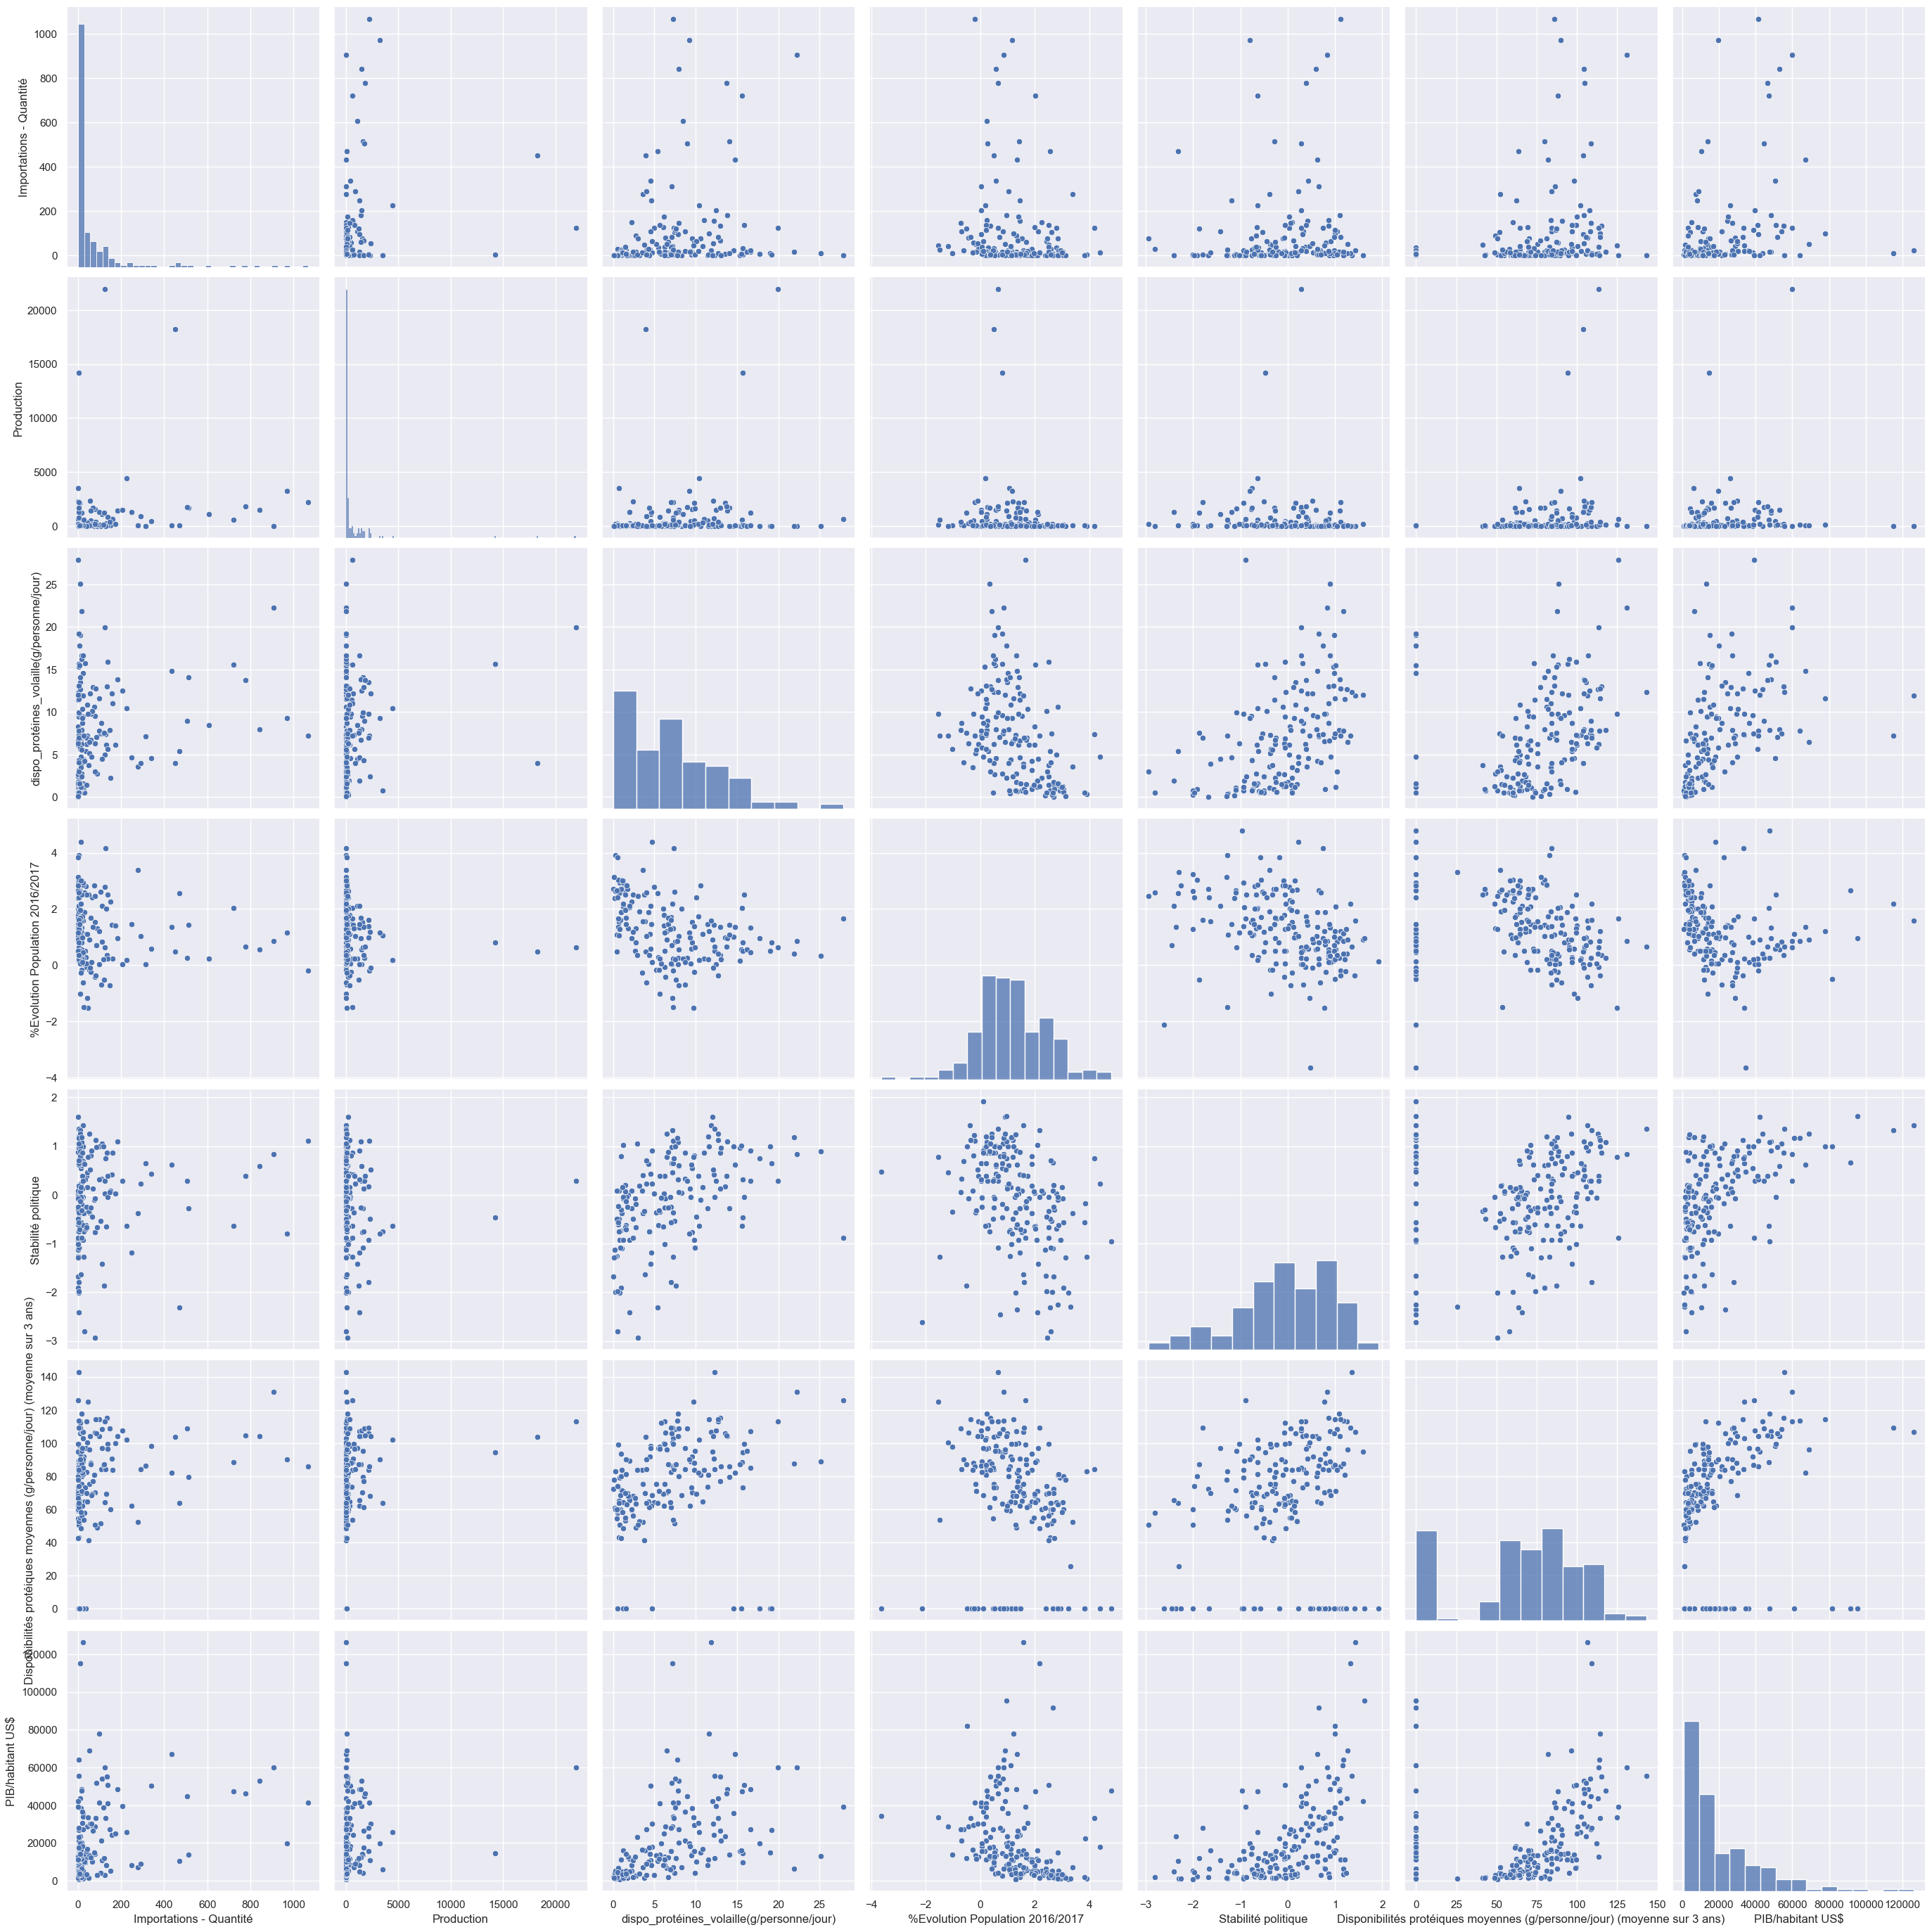

In [10]:
sns.pairplot(df,height=4, kind='scatter', vars=['Importations - Quantité','Production','dispo_protéines_volaille(g/personne/jour)',
 '%Evolution Population 2016/2017','Stabilité politique',
'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)', 'PIB/habitant US$'])
plt.show()

In [11]:
corr_matrix = df.corr()
print(corr_matrix)

                                                    dispo_protéines_volaille(g/personne/jour)  \
dispo_protéines_volaille(g/personne/jour)                                            1.000000   
Importations - Quantité                                                              0.215426   
Production                                                                           0.183491   
%Evolution Population 2016/2017                                                     -0.412146   
Population 2017                                                                     -0.093954   
Disponibilités protéiques moyennes (g/personne/...                                   0.296174   
PIB/habitant US$                                                                     0.492540   
Stabilité politique                                                                  0.464313   

                                                    Importations - Quantité  \
dispo_protéines_volaille(g/personne/jour)      

<Axes: >

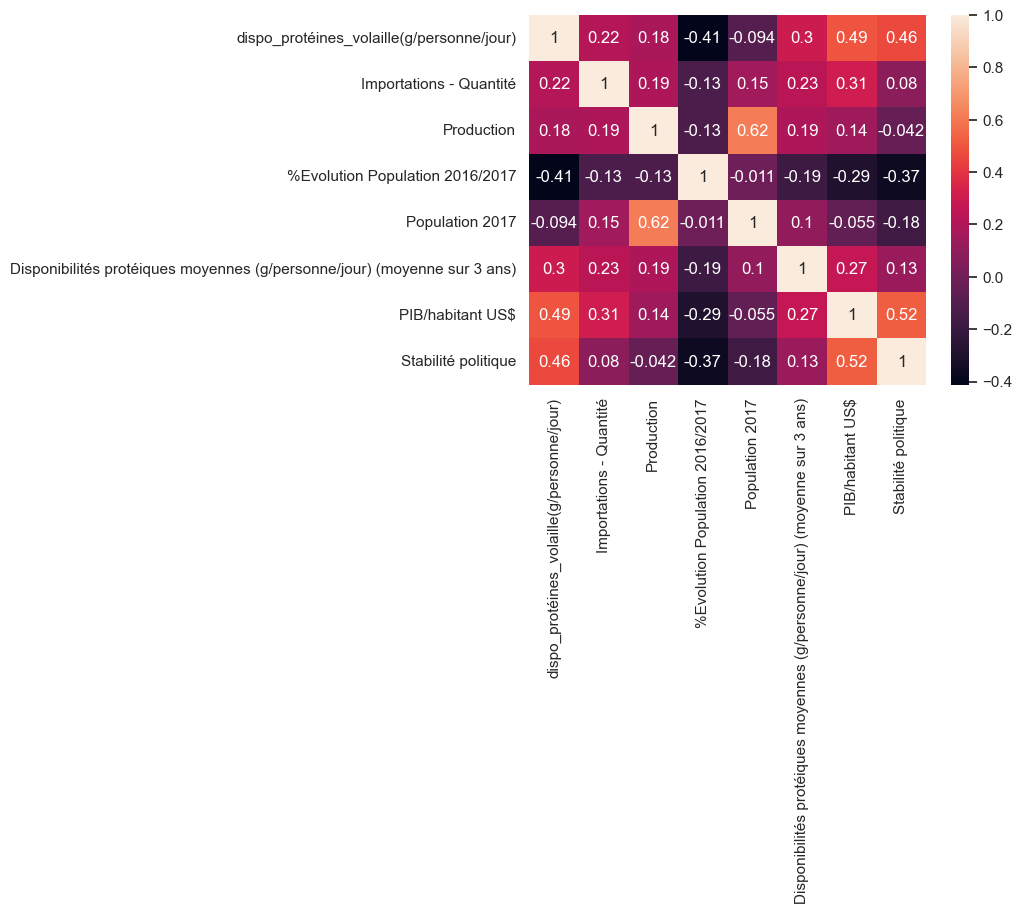

In [12]:
sns.heatmap(corr_matrix, annot=True)

Ceux son des variables linéairement non corrélées

## Valeurs NaN

In [13]:
cols = ['Importations - Quantité','Production','dispo_protéines_volaille(g/personne/jour)',
 '%Evolution Population 2016/2017','Stabilité politique',
'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)','PIB/habitant US$']
cols

['Importations - Quantité',
 'Production',
 'dispo_protéines_volaille(g/personne/jour)',
 '%Evolution Population 2016/2017',
 'Stabilité politique',
 'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
 'PIB/habitant US$']

In [14]:
df = df[cols]
df.head()

,Importations - Quantité,Production,dispo_protéines_volaille(g/personne/jour),%Evolution Population 2016/2017,Stabilité politique,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$
Zone,,,,,,,
Afghanistan,29.0,28.0,0.54,2.58,-2.80,58.0,2058.4
Afrique du Sud,514.0,1667.0,14.11,1.43,-0.28,79.7,13860.3
Albanie,38.0,13.0,6.26,-0.08,0.38,113.3,12771.0
Algérie,2.0,275.0,1.97,2.07,-0.92,89.3,11737.4
Allemagne,842.0,1514.0,7.96,0.57,0.59,104.3,53071.5


In [15]:
df.shape

(236, 7)

In [16]:
df.isnull().sum()

Importations - Quantité                                                     66
Production                                                                  68
dispo_protéines_volaille(g/personne/jour)                                   64
%Evolution Population 2016/2017                                              0
Stabilité politique                                                         40
Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)    34
PIB/habitant US$                                                            51
dtype: int64

In [17]:
df.isna().sum()

Importations - Quantité                                                     66
Production                                                                  68
dispo_protéines_volaille(g/personne/jour)                                   64
%Evolution Population 2016/2017                                              0
Stabilité politique                                                         40
Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)    34
PIB/habitant US$                                                            51
dtype: int64

In [18]:
df[df.isna().any(axis=1)]

,Importations - Quantité,Production,dispo_protéines_volaille(g/personne/jour),%Evolution Population 2016/2017,Stabilité politique,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$
Zone,,,,,,,
Andorre,NaN,NaN,NaN,-0.38,1.42,0.0,NaN
Anguilla,NaN,NaN,NaN,1.07,NaN,NaN,NaN
Antilles néerlandaises (ex),NaN,NaN,NaN,0.91,NaN,NaN,NaN
Aruba,NaN,NaN,NaN,0.47,NaN,NaN,NaN
Bahreïn,NaN,NaN,NaN,4.79,-0.96,0.0,47709.8
...,...,...,...,...,...,...,...
Tokélaou,NaN,NaN,NaN,1.40,NaN,0.0,NaN
Tonga,NaN,NaN,NaN,0.86,0.79,0.0,6466.3
Tuvalu,NaN,NaN,NaN,1.29,1.24,0.0,4010.1


In [19]:
#Supprimer les lignes ayant plus de 4 NaN.
df=df.dropna(thresh=df.shape[1] - 4)

In [20]:
df.isna().sum()

Importations - Quantité                                                     30
Production                                                                  32
dispo_protéines_volaille(g/personne/jour)                                   28
%Evolution Population 2016/2017                                              0
Stabilité politique                                                          4
Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)     1
PIB/habitant US$                                                            15
dtype: int64

In [21]:
df[df.isna().any(axis=1)]

,Importations - Quantité,Production,dispo_protéines_volaille(g/personne/jour),%Evolution Population 2016/2017,Stabilité politique,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$
Zone,,,,,,,
Andorre,NaN,NaN,NaN,-0.38,1.42,0.0,NaN
Bahreïn,NaN,NaN,NaN,4.79,-0.96,0.0,47709.8
Bermudes,NaN,NaN,NaN,-0.49,1.00,0.0,81835.0
Bhoutan,NaN,NaN,NaN,1.20,1.12,0.0,11142.5
Brunéi Darussalam,NaN,NaN,NaN,1.11,1.16,0.0,60994.5
Burundi,NaN,NaN,NaN,3.23,-2.01,0.0,773.6
"Chine, continentale",452.0,18236.0,3.96,0.49,NaN,103.7,NaN
"Chine, Taiwan Province de",161.0,652.0,11.01,0.24,0.86,83.7,NaN
Comores,NaN,NaN,NaN,2.30,0.04,55.0,3032.3


Remplacement des NaN par la valeur moyenne sur la variable 'PIB/habitant US$'

In [22]:
moyenne_PIB = df['PIB/habitant US$'].mean()

In [23]:
df['PIB/habitant US$'] = df['PIB/habitant US$'].fillna(moyenne_PIB)

In [24]:
#Les autres NaN remplacés par '0'
df = df.fillna(0)

In [25]:
df.isna().sum()

Importations - Quantité                                                     0
Production                                                                  0
dispo_protéines_volaille(g/personne/jour)                                   0
%Evolution Population 2016/2017                                             0
Stabilité politique                                                         0
Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)    0
PIB/habitant US$                                                            0
dtype: int64

In [26]:
df.shape

(200, 7)

##  Data Split

In [27]:
X = df.values
X[:7]

array([[ 2.90000000e+01,  2.80000000e+01,  5.40000000e-01,
         2.58000000e+00, -2.80000000e+00,  5.80000000e+01,
         2.05840000e+03],
       [ 5.14000000e+02,  1.66700000e+03,  1.41100000e+01,
         1.43000000e+00, -2.80000000e-01,  7.97000000e+01,
         1.38603000e+04],
       [ 3.80000000e+01,  1.30000000e+01,  6.26000000e+00,
        -8.00000000e-02,  3.80000000e-01,  1.13300000e+02,
         1.27710000e+04],
       [ 2.00000000e+00,  2.75000000e+02,  1.97000000e+00,
         2.07000000e+00, -9.20000000e-01,  8.93000000e+01,
         1.17374000e+04],
       [ 8.42000000e+02,  1.51400000e+03,  7.96000000e+00,
         5.70000000e-01,  5.90000000e-01,  1.04300000e+02,
         5.30715000e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.80000000e-01,  1.42000000e+00,  0.00000000e+00,
         2.07752935e+04],
       [ 2.77000000e+02,  4.20000000e+01,  3.60000000e+00,
         3.38000000e+00, -3.80000000e-01,  5.24000000e+01,
         7.3109000

In [28]:
type(X)

numpy.ndarray

In [29]:
X.shape

(200, 7)

In [30]:
#les noms de nos cours dans une variable `names` : 
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine',
       ...
       'Turquie', 'Tuvalu', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe'],
      dtype='object', name='Zone', length=200)

In [31]:
#colonnes, nos features, dans une variable features :
features = df.columns
features

Index(['Importations - Quantité', 'Production',
       'dispo_protéines_volaille(g/personne/jour)',
       '%Evolution Population 2016/2017', 'Stabilité politique',
       'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       'PIB/habitant US$'],
      dtype='object')

In [32]:
#mise à l'échelle de la variance
std_scale= preprocessing.StandardScaler().fit(X)

In [33]:
X_scaled=std_scale.transform(X)

In [34]:
X_scaled[:7]

array([[-0.26984169, -0.25254662, -0.97281288,  1.07885513, -2.78354458,
        -0.24658091, -0.88468999],
       [ 2.50878297,  0.45969082,  1.39114872,  0.14068477, -0.21839406,
         0.34821742, -0.32685048],
       [-0.21827959, -0.25906496,  0.02363962, -1.09117372,  0.45343107,
         1.26919549, -0.37833834],
       [-0.42452802, -0.14521126, -0.72369976,  0.66279697, -0.86986086,
         0.61135401, -0.42719343],
       [ 4.38793531,  0.39320373,  0.31978808, -0.56090351,  0.66719361,
         1.02250494,  1.52654235],
       [-0.43598626, -0.26471419, -1.06688357, -1.33591382,  1.51206462,
        -1.83636449,  0.        ],
       [ 1.15098081, -0.24646283, -0.43974564,  1.73149539, -0.32018575,
        -0.40007726, -0.63642047]])

 ## Clustering

### Dendrogram

In [35]:
Z = linkage(X_scaled, method="ward",metric='euclidean')

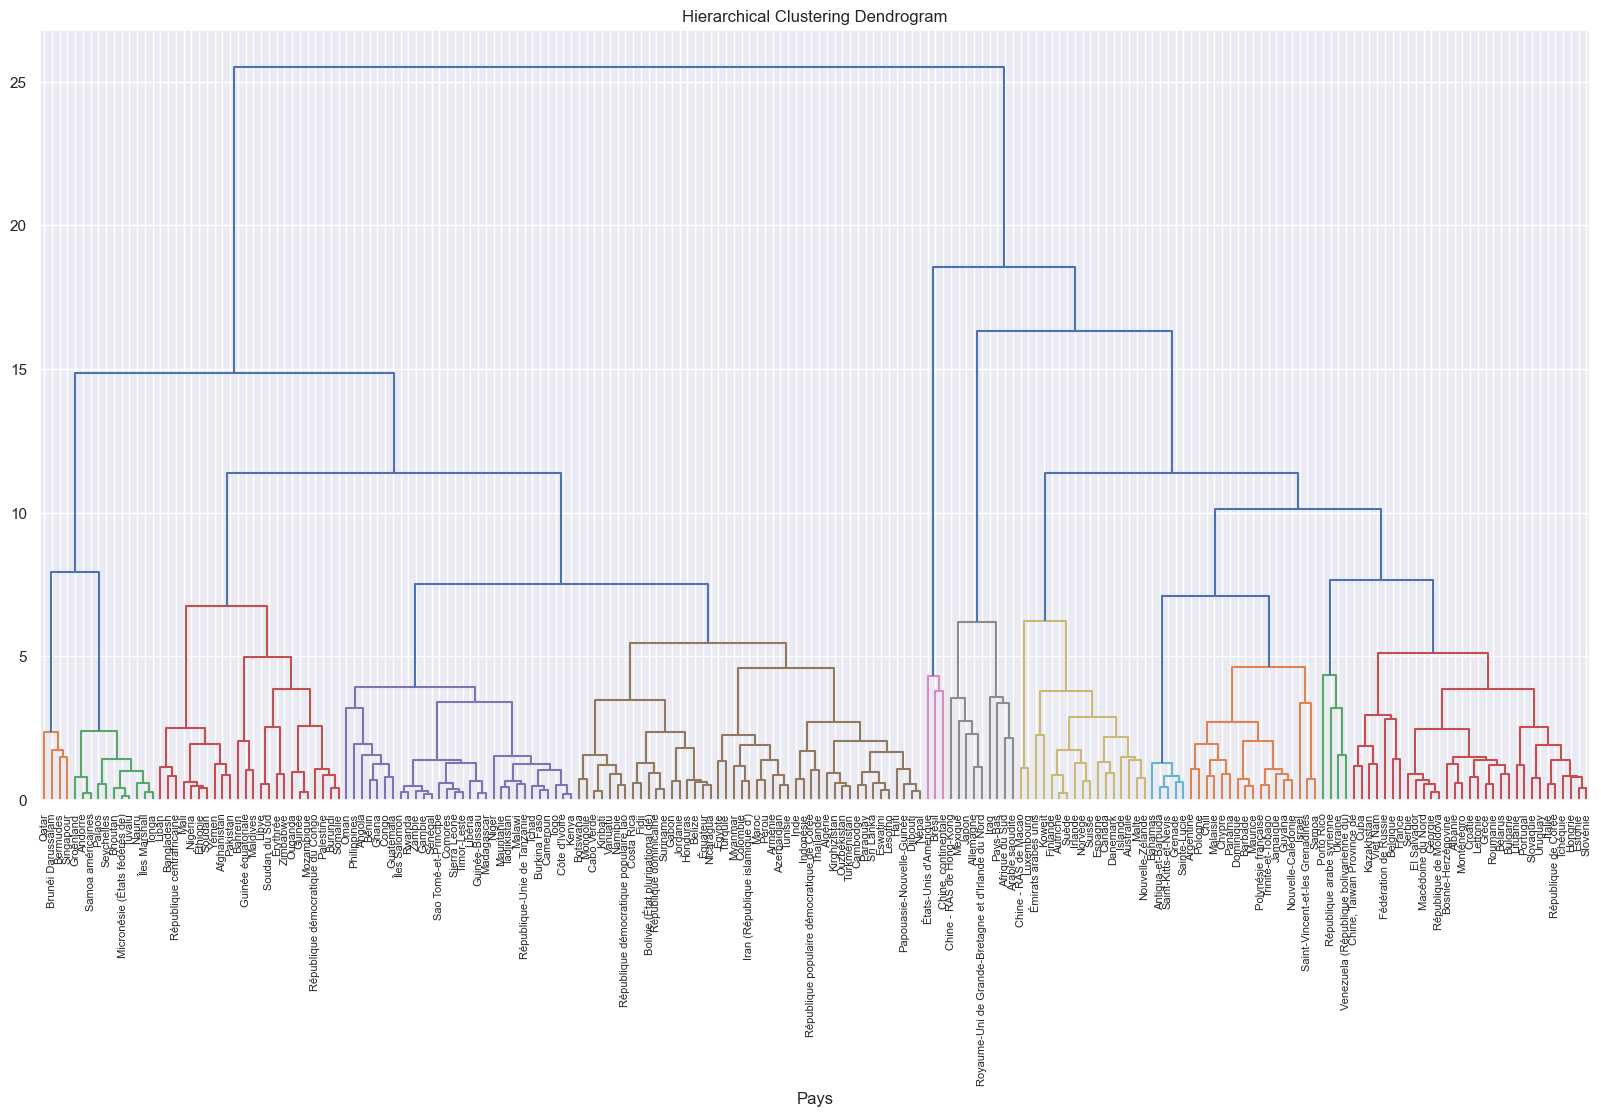

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

_ = dendrogram(Z, ax=ax, labels=names,leaf_font_size=10, color_threshold=7, orientation='top')

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=8)

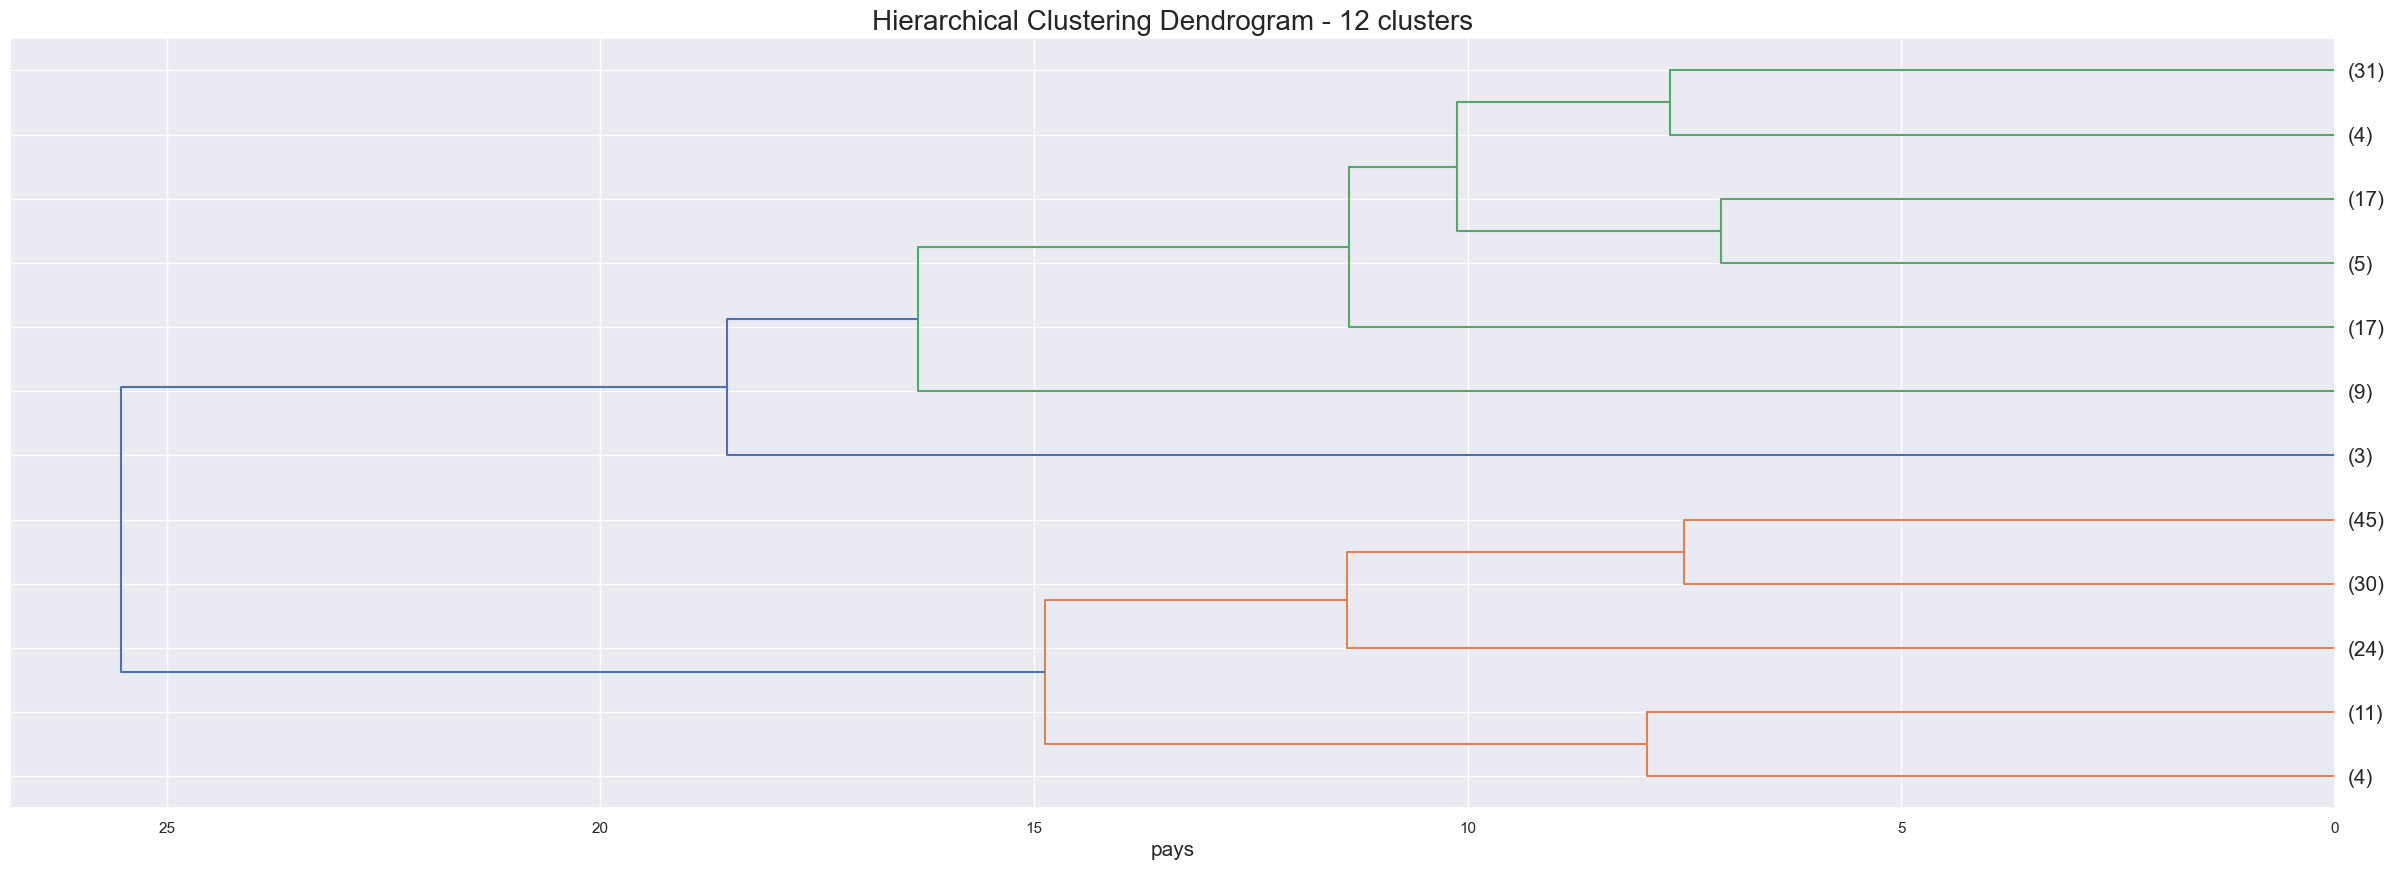

In [37]:
fig = plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram - 12 clusters', fontsize=20)
plt.xlabel('pays', fontsize=15)

dendrogram(Z, labels = names, p=12, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

Coupage du dendrogramme en 12 groupes, donc 4 groupes a <= 4 Pays

### Silhouette

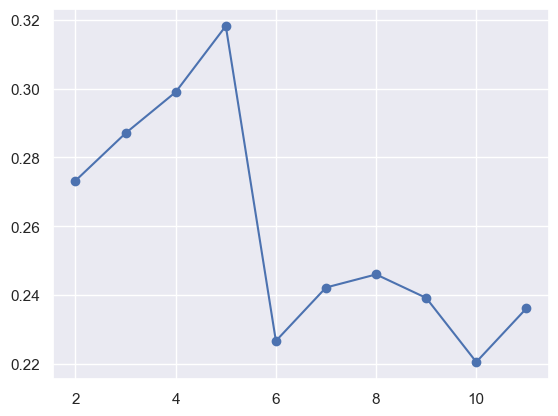

In [38]:
silhouettes=[]
for num_clusters in range(2,12):
    cls=cluster.KMeans(n_clusters=num_clusters,
                       n_init=1, init='random')
    cls.fit(X_scaled)
    silh=metrics.silhouette_score(X_scaled,cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2,12), silhouettes, marker='o')

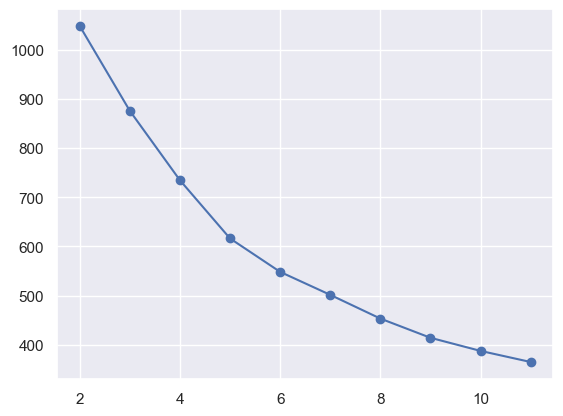

In [39]:
inerties=[]
for k in range(2, 12):
    
    km = cluster.KMeans(n_clusters=k)
    km.fit(X_scaled)
    
    inerties.append(km.inertia_)

plt.plot(range(2, 12), inerties, marker='o')
plt.show()

La métrique de l'inertie permet également d'avoir une estimation du clustering le plus optimal,l'analyse sera plus fine en 5 clusters

## K-Means

In [40]:
kmeans= KMeans(n_clusters=5)
kmeans.fit(X_scaled)
y_kmeans=kmeans.predict(X_scaled)

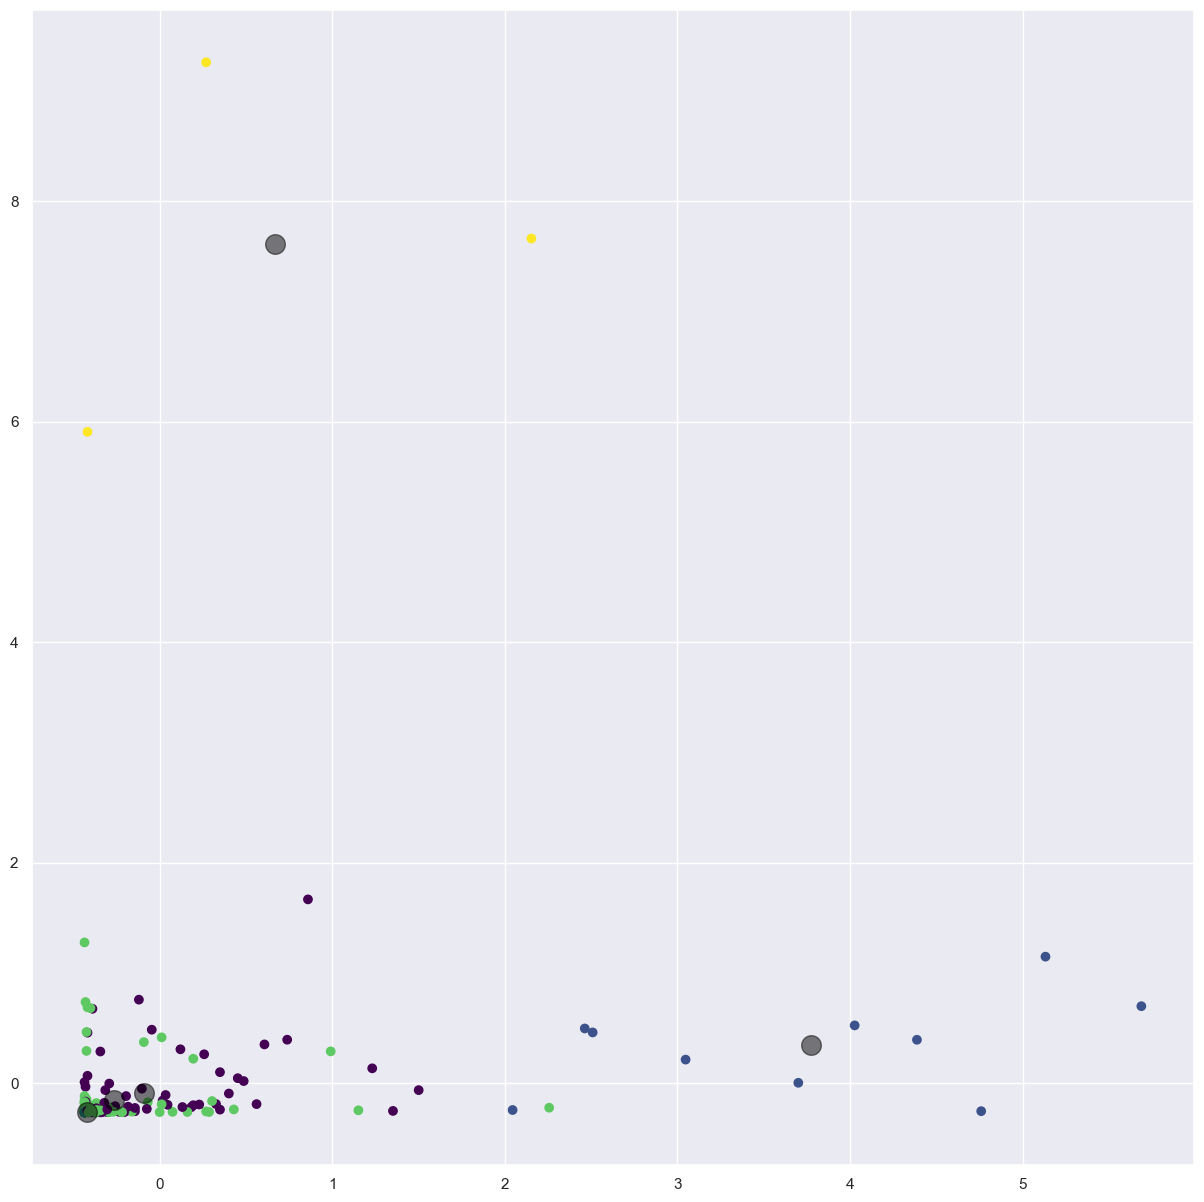

In [41]:
plt.figure(figsize=(15, 15))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)

In [42]:
centroids
pd.DataFrame(centroids, columns=features)

,Importations - Quantité,Production,dispo_protéines_volaille(g/personne/jour),%Evolution Population 2016/2017,Stabilité politique,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$
0,-0.088496,-0.087317,0.664551,-0.655428,0.487905,0.732470,0.441984
1,3.776065,0.343534,1.065385,-0.342269,0.280385,0.561194,0.975595
2,-0.423033,-0.264563,-0.414751,-0.667312,0.858828,-1.836364,0.394256
3,-0.262889,-0.153102,-0.614029,0.780034,-0.664791,-0.239713,-0.601429
4,0.667825,7.608139,1.230880,-0.498359,0.005548,1.007886,0.518184


cluster 2 peu de demande d'importation; cluster 3 PIB bas, pays pas stable; cluster 4 a une importe production

In [43]:
df['Cluster']=kmeans.labels_

In [44]:
df=df.reset_index()
df.head()

,Zone,Importations - Quantité,Production,dispo_protéines_volaille(g/personne/jour),%Evolution Population 2016/2017,Stabilité politique,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$,Cluster
0,Afghanistan,29.0,28.0,0.54,2.58,-2.80,58.0,2058.4,3
1,Afrique du Sud,514.0,1667.0,14.11,1.43,-0.28,79.7,13860.3,1
2,Albanie,38.0,13.0,6.26,-0.08,0.38,113.3,12771.0,0
3,Algérie,2.0,275.0,1.97,2.07,-0.92,89.3,11737.4,3
4,Allemagne,842.0,1514.0,7.96,0.57,0.59,104.3,53071.5,1


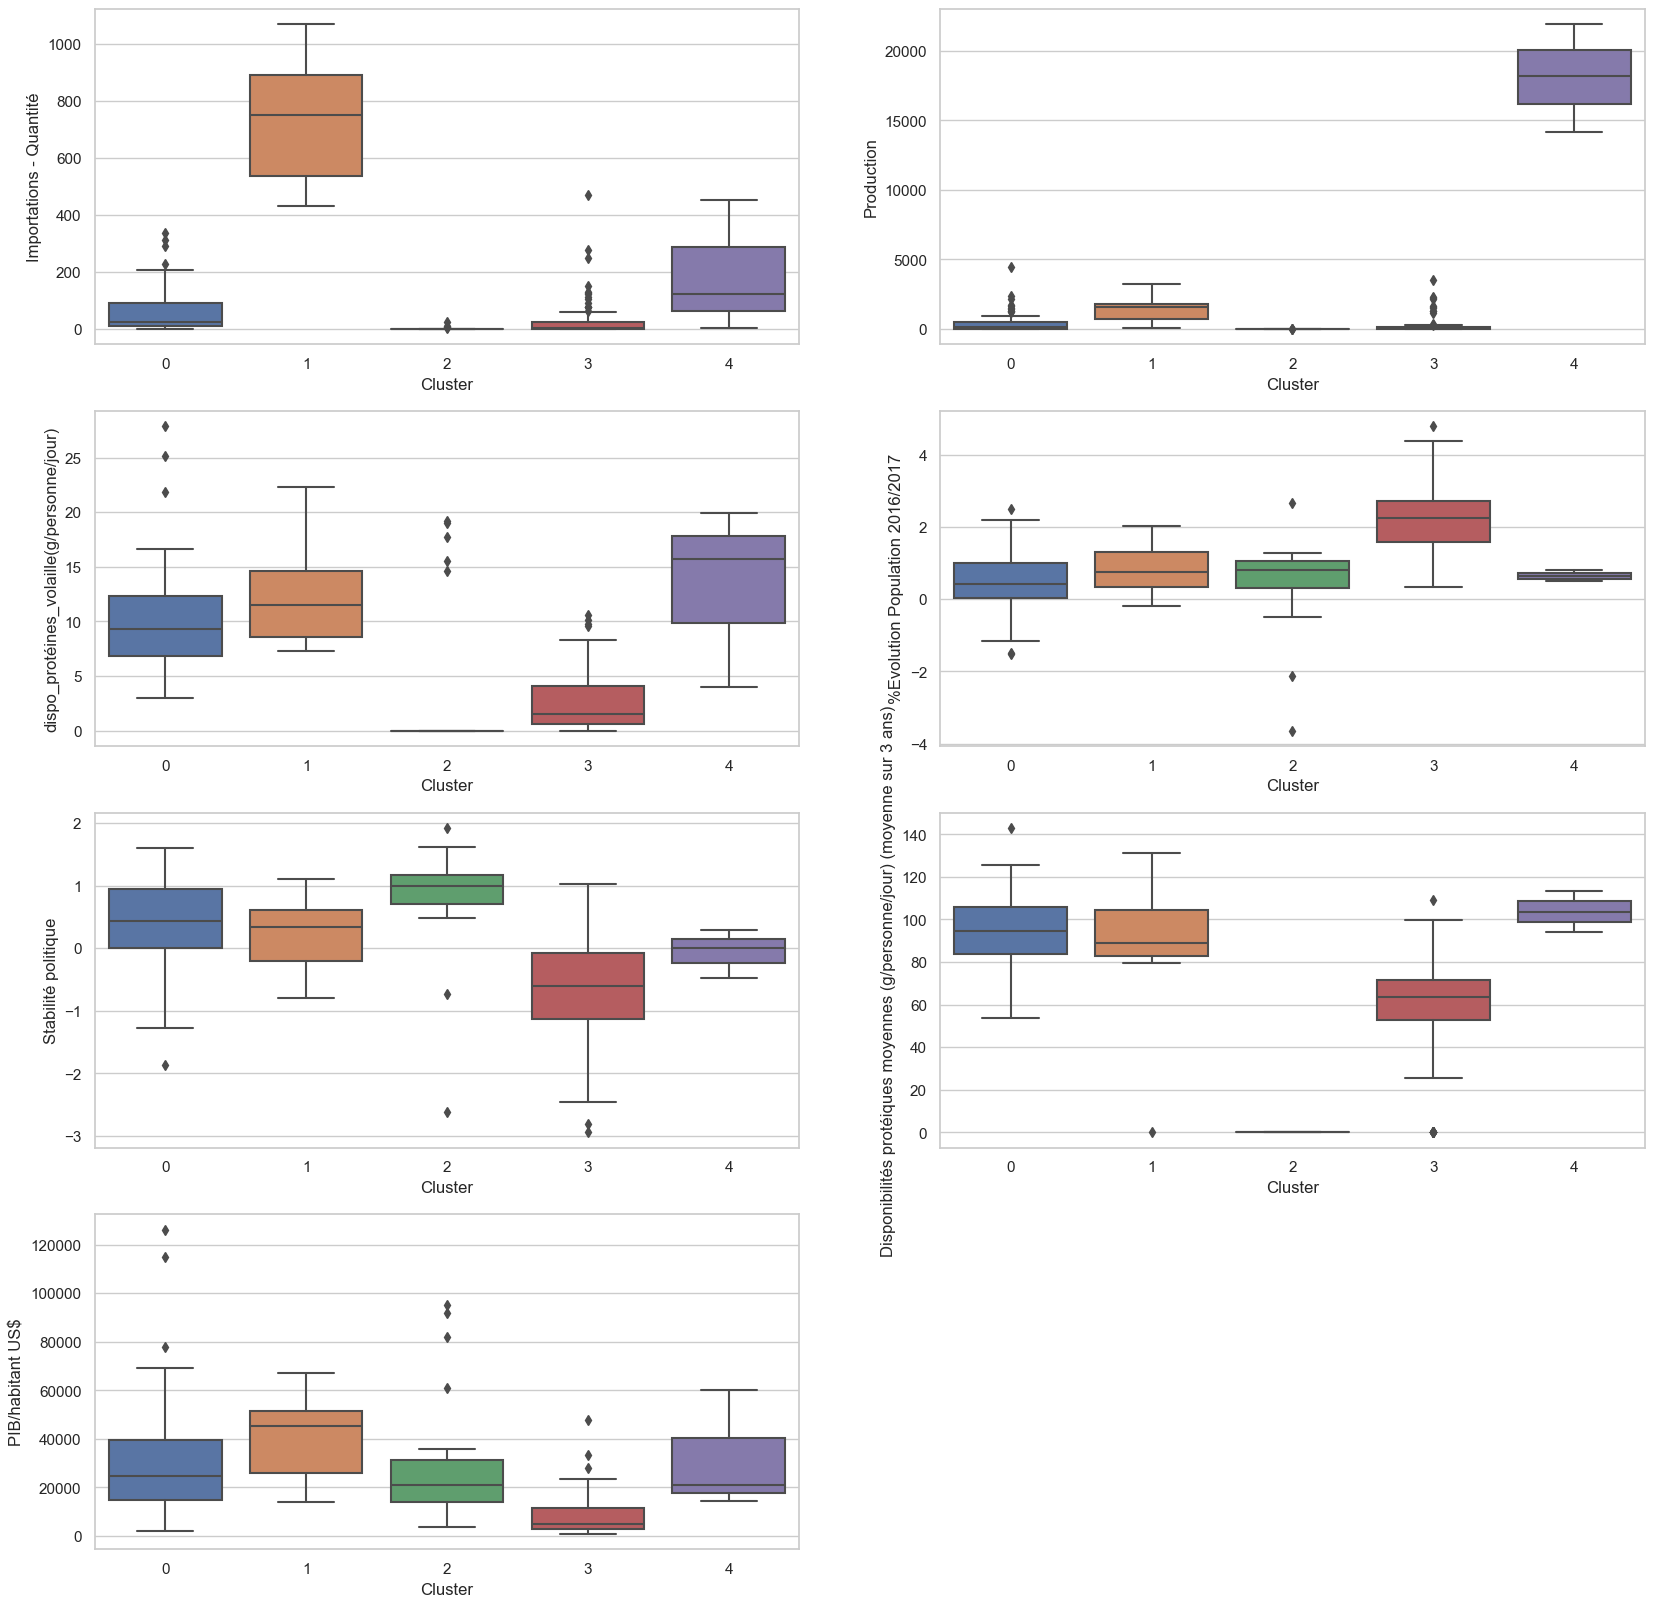

In [45]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(421)
sns.boxplot(data=df, x='Cluster', y='Importations - Quantité')

plt.subplot(422)
sns.boxplot(data=df, x='Cluster', y='Production')

plt.subplot(423)
sns.boxplot(data=df, x='Cluster', y='dispo_protéines_volaille(g/personne/jour)')

plt.subplot(424)
sns.boxplot(data=df, x='Cluster', y='%Evolution Population 2016/2017')

plt.subplot(425)
sns.boxplot(data=df, x='Cluster', y='Stabilité politique')

plt.subplot(426)
sns.boxplot(data=df, x='Cluster', y='Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)')

plt.subplot(427)
sns.boxplot(data=df, x='Cluster', y='PIB/habitant US$')

plt.show(block=False)


In [46]:
print(df[df['Cluster'] == 0]['Zone'].unique())

['Albanie' 'Argentine' 'Arménie' 'Australie' 'Autriche' 'Barbade'
 'Bélarus' 'Belgique' 'Bolivie (État plurinational de)'
 'Bosnie-Herzégovine' 'Bulgarie' 'Cabo Verde' 'Canada' 'Chili'
 'Chine - RAS de Macao' 'Chine, Taiwan Province de' 'Chypre' 'Costa Rica'
 'Croatie' 'Cuba' 'Danemark' 'Dominique' 'El Salvador' 'Espagne' 'Estonie'
 'Fédération de Russie' 'Fidji' 'Finlande' 'Géorgie' 'Grèce' 'Guyana'
 'Hongrie' 'Irlande' 'Islande' 'Israël' 'Italie' 'Jamaïque' 'Kazakhstan'
 'Kiribati' 'Koweït' 'Lettonie' 'Lituanie' 'Luxembourg'
 'Macédoine du Nord' 'Malaisie' 'Malte' 'Maroc' 'Maurice' 'Monténégro'
 'Myanmar' 'Norvège' 'Nouvelle-Calédonie' 'Nouvelle-Zélande' 'Panama'
 'Pologne' 'Polynésie française' 'Portugal' 'République de Corée'
 'République de Moldova' 'République dominicaine' 'Roumanie'
 'Saint-Vincent-et-les Grenadines' 'Samoa' 'Serbie' 'Slovaquie' 'Slovénie'
 'Suède' 'Suisse' 'Suriname' 'Tchéquie' 'Trinité-et-Tobago' 'Ukraine'
 'Uruguay' 'Venezuela (République bolivarienne du)' 'V

In [47]:
print(df[df['Cluster'] == 1]['Zone'].unique())

['Afrique du Sud' 'Allemagne' 'Arabie saoudite' 'Chine - RAS de Hong-Kong'
 'Émirats arabes unis' 'France' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [48]:
print(df[df['Cluster'] == 2]['Zone'].unique())

['Andorre' 'Antigua-et-Barbuda' 'Bahamas' 'Bermudes' 'Bhoutan'
 'Brunéi Darussalam' 'Érythrée' 'Grenade' 'Groenland' 'Îles Marshall'
 'Micronésie (États fédérés de)' 'Nauru' 'Palaos' 'Porto Rico' 'Qatar'
 'République arabe syrienne' 'Sainte-Lucie' 'Saint-Kitts-et-Nevis'
 'Samoa américaines' 'Seychelles' 'Singapour' 'Tonga' 'Tuvalu']


Cluster 2 peu de demande d'importation

In [49]:
print(df[df['Cluster'] == 3]['Zone'].unique())

['Afghanistan' 'Algérie' 'Angola' 'Azerbaïdjan' 'Bahreïn' 'Bangladesh'
 'Belize' 'Bénin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cambodge'
 'Cameroun' 'Colombie' 'Comores' 'Congo' "Côte d'Ivoire" 'Djibouti'
 'Égypte' 'Équateur' 'Eswatini' 'Éthiopie' 'Gabon' 'Gambie' 'Ghana'
 'Guatemala' 'Guinée' 'Guinée équatoriale' 'Guinée-Bissau' 'Haïti'
 'Honduras' 'Îles Salomon' 'Inde' 'Indonésie'
 "Iran (République islamique d')" 'Iraq' 'Jordanie' 'Kenya' 'Kirghizistan'
 'Lesotho' 'Liban' 'Libéria' 'Libye' 'Madagascar' 'Malawi' 'Maldives'
 'Mali' 'Mauritanie' 'Mongolie' 'Mozambique' 'Namibie' 'Népal' 'Nicaragua'
 'Niger' 'Nigéria' 'Oman' 'Ouganda' 'Ouzbékistan' 'Pakistan' 'Palestine'
 'Papouasie-Nouvelle-Guinée' 'Paraguay' 'Pérou' 'Philippines'
 'République centrafricaine' 'République démocratique du Congo'
 'République démocratique populaire lao'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Rwanda' 'Sao Tomé-et-Principe' 'Sénégal'
 'Sierra Leone' 'Somalie' 'Soudan' '

Cluster 3 pays pas stables, PIB bas

In [50]:
print(df[df['Cluster'] == 4]['Zone'].unique())

['Brésil' 'Chine, continentale' "États-Unis d'Amérique"]


Cluster 4 gros producteurs volaille

In [51]:
df_subset = df.query('[0,1] in Cluster') 
df_subset.shape

(85, 9)

# PCA

In [52]:
df_subset.head()

,Zone,Importations - Quantité,Production,dispo_protéines_volaille(g/personne/jour),%Evolution Population 2016/2017,Stabilité politique,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$,Cluster
1,Afrique du Sud,514.0,1667.0,14.11,1.43,-0.28,79.7,13860.3,1
2,Albanie,38.0,13.0,6.26,-0.08,0.38,113.3,12771.0,0
4,Allemagne,842.0,1514.0,7.96,0.57,0.59,104.3,53071.5,1
8,Arabie saoudite,722.0,616.0,15.57,2.03,-0.64,88.3,47306.2,1
9,Argentine,8.0,2161.0,13.53,0.99,0.17,105.7,23597.1,0


In [53]:
df_subset.set_index('Zone', inplace=True)

In [54]:
df_subset.drop(['Cluster'],  axis=1, inplace=True)

In [55]:
df_subset.sample(1)

,Importations - Quantité,Production,dispo_protéines_volaille(g/personne/jour),%Evolution Population 2016/2017,Stabilité politique,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$
Zone,,,,,,,
Bélarus,21.0,463.0,9.41,0.05,-0.05,89.0,18356.1


In [56]:
Xs = df_subset.values
Xs.shape

(85, 7)

In [57]:
Xs[:7]

array([[ 5.14000e+02,  1.66700e+03,  1.41100e+01,  1.43000e+00,
        -2.80000e-01,  7.97000e+01,  1.38603e+04],
       [ 3.80000e+01,  1.30000e+01,  6.26000e+00, -8.00000e-02,
         3.80000e-01,  1.13300e+02,  1.27710e+04],
       [ 8.42000e+02,  1.51400e+03,  7.96000e+00,  5.70000e-01,
         5.90000e-01,  1.04300e+02,  5.30715e+04],
       [ 7.22000e+02,  6.16000e+02,  1.55700e+01,  2.03000e+00,
        -6.40000e-01,  8.83000e+01,  4.73062e+04],
       [ 8.00000e+00,  2.16100e+03,  1.35300e+01,  9.90000e-01,
         1.70000e-01,  1.05700e+02,  2.35971e+04],
       [ 3.50000e+01,  1.10000e+01,  5.44000e+00,  2.90000e-01,
        -6.20000e-01,  9.70000e+01,  1.21151e+04],
       [ 1.60000e+01,  1.26900e+03,  1.66000e+01,  1.33000e+00,
         9.00000e-01,  1.07000e+02,  4.83985e+04]])

In [58]:
std_scale = preprocessing.StandardScaler().fit(Xs)
Xs_scaled = std_scale.transform(Xs)

In [59]:
idx = ["mean", "std"]

pd.DataFrame(Xs_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01


In [60]:
n_components = 7

In [61]:
pca = PCA(n_components=n_components)

In [62]:
pca.fit(Xs_scaled)

PCA(n_components=7)

## Variance & scree plot

In [63]:
pca.explained_variance_ratio_

array([0.28753646, 0.23701707, 0.15708597, 0.12524386, 0.08924198,
       0.06064962, 0.04322505])

In [64]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([28.75, 23.7 , 15.71, 12.52,  8.92,  6.06,  4.32])

In [65]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 29.,  52.,  68.,  81.,  90.,  96., 100.])

In [66]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

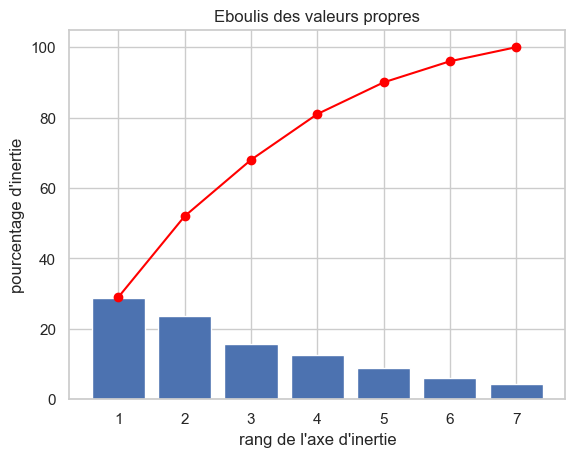

In [67]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

En bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée, près de 80% de la variance est comprise dans les 4 premières composantes.

## Components

In [68]:
pcs = pca.components_
pcs

array([[ 6.35373820e-02, -1.03865823e-01,  2.92272884e-01,
         3.37344717e-01,  4.75868137e-01,  4.59203397e-01,
         5.90450465e-01],
       [ 6.09019211e-01,  6.45744323e-01,  2.35137503e-01,
         2.38081910e-01, -3.12760256e-01, -5.64572223e-04,
         4.81449064e-02],
       [-2.63334187e-01, -2.30749299e-01,  5.81683346e-01,
         5.83261713e-01, -1.46411761e-01, -3.35835490e-01,
        -2.54240528e-01],
       [ 3.12510859e-01, -1.34417006e-01, -4.78255168e-01,
         3.73886803e-01,  2.90239128e-01, -6.20803463e-01,
         2.14741691e-01],
       [ 3.99874254e-01, -1.22503485e-01,  4.82646845e-01,
        -4.77257135e-01,  4.92825222e-01, -2.75078435e-01,
        -2.14070742e-01],
       [-4.48406934e-01,  6.75587086e-01, -4.93654067e-02,
         9.65897250e-02,  5.26206577e-01, -1.01908717e-01,
        -2.08489914e-01],
       [-3.11580604e-01,  1.71720629e-01,  2.38366262e-01,
        -3.35299912e-01, -2.24243892e-01, -4.52654365e-01,
         6.7007742

In [69]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.063537,-0.103866,0.292273,0.337345,0.475868,0.459203,0.590450
1,0.609019,0.645744,0.235138,0.238082,-0.312760,-0.000565,0.048145
2,-0.263334,-0.230749,0.581683,0.583262,-0.146412,-0.335835,-0.254241
3,0.312511,-0.134417,-0.478255,0.373887,0.290239,-0.620803,0.214742
4,0.399874,-0.122503,0.482647,-0.477257,0.492825,-0.275078,-0.214071
5,-0.448407,0.675587,-0.049365,0.096590,0.526207,-0.101909,-0.208490
6,-0.311581,0.171721,0.238366,-0.335300,-0.224244,-0.452654,0.670077


In [70]:
names_subset = df_subset.index
names_subset

Index(['Afrique du Sud', 'Albanie', 'Allemagne', 'Arabie saoudite',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Barbade', 'Bélarus',
       'Belgique', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Bulgarie', 'Cabo Verde', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chypre',
       'Costa Rica', 'Croatie', 'Cuba', 'Danemark', 'Dominique', 'El Salvador',
       'Émirats arabes unis', 'Espagne', 'Estonie', 'Fédération de Russie',
       'Fidji', 'Finlande', 'France', 'Géorgie', 'Grèce', 'Guyana', 'Hongrie',
       'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque', 'Japon',
       'Kazakhstan', 'Kiribati', 'Koweït', 'Lettonie', 'Lituanie',
       'Luxembourg', 'Macédoine du Nord', 'Malaisie', 'Malte', 'Maroc',
       'Maurice', 'Mexique', 'Monténégro', 'Myanmar', 'Norvège',
       'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Panama', 'Pays-Bas',
       'Pologne', 'Polynésie française', 'Portug

In [71]:
features_subset = df_subset.columns
features_subset

Index(['Importations - Quantité', 'Production',
       'dispo_protéines_volaille(g/personne/jour)',
       '%Evolution Population 2016/2017', 'Stabilité politique',
       'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       'PIB/habitant US$'],
      dtype='object')

In [72]:
pcs.columns = features_subset
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Importations - Quantité,Production,dispo_protéines_volaille(g/personne/jour),%Evolution Population 2016/2017,Stabilité politique,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$
F1,0.06,-0.10,0.29,0.34,0.48,0.46,0.59
F2,0.61,0.65,0.24,0.24,-0.31,-0.00,0.05
F3,-0.26,-0.23,0.58,0.58,-0.15,-0.34,-0.25
F4,0.31,-0.13,-0.48,0.37,0.29,-0.62,0.21
F5,0.40,-0.12,0.48,-0.48,0.49,-0.28,-0.21
F6,-0.45,0.68,-0.05,0.10,0.53,-0.10,-0.21
F7,-0.31,0.17,0.24,-0.34,-0.22,-0.45,0.67


In [73]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7
Importations - Quantité,0.063537,0.609019,-0.263334,0.312511,0.399874,-0.448407,-0.311581
Production,-0.103866,0.645744,-0.230749,-0.134417,-0.122503,0.675587,0.171721
dispo_protéines_volaille(g/personne/jour),0.292273,0.235138,0.581683,-0.478255,0.482647,-0.049365,0.238366
%Evolution Population 2016/2017,0.337345,0.238082,0.583262,0.373887,-0.477257,0.096590,-0.335300
Stabilité politique,0.475868,-0.312760,-0.146412,0.290239,0.492825,0.526207,-0.224244
Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),0.459203,-0.000565,-0.335835,-0.620803,-0.275078,-0.101909,-0.452654
PIB/habitant US$,0.590450,0.048145,-0.254241,0.214742,-0.214071,-0.208490,0.670077


<Axes: >

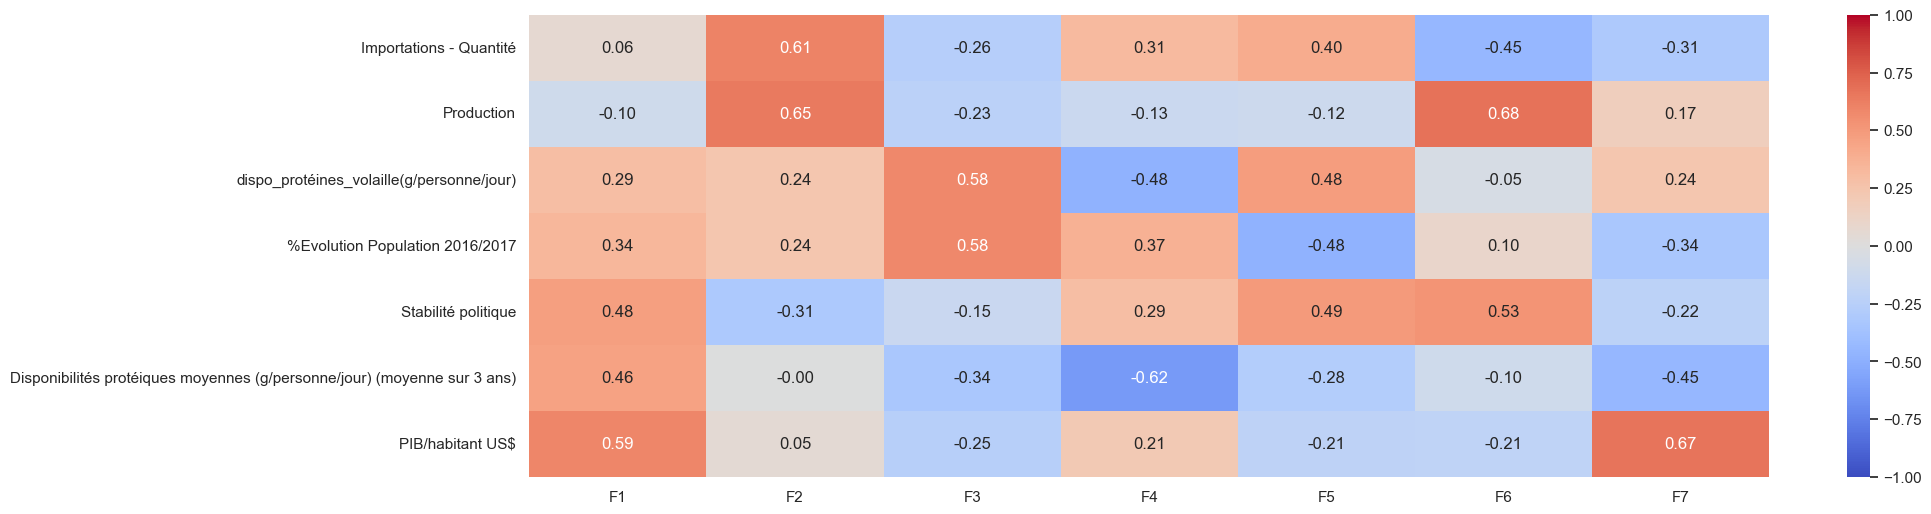

In [74]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

F1: situation économie politique,  F2: quantité en volaille, F3: évolution population et besoin proteines, F4: Politique et population

## Correlation graph

In [75]:
pca.explained_variance_

array([2.03671663, 1.6788709 , 1.11269225, 0.88714398, 0.63213069,
       0.42960147, 0.30617741])

La propriété explained_variance_ de l'objet PCA renvoie un tableau (array) où chaque élément correspond à la variance expliquée par une composante principale spécifique. Les éléments du tableau sont triés par ordre décroissant, de sorte que le premier élément correspond à la variance expliquée par la première composante principale, le deuxième élément correspond à la variance expliquée par la deuxième composante principale, et ainsi de suite.

In [76]:
pca.explained_variance_ratio_

array([0.28753646, 0.23701707, 0.15708597, 0.12524386, 0.08924198,
       0.06064962, 0.04322505])

La propriété explained_variance_ratio_ de l'objet PCA renvoie un tableau (array) où chaque élément représente la proportion de variance expliquée par une composante principale spécifique. Les éléments du tableau sont triés par ordre décroissant, de sorte que le premier élément correspond à la proportion de variance expliquée par la première composante principale, le deuxième élément correspond à la proportion de variance expliquée par la deuxième composante principale, et ainsi de suite.
La somme de toutes les valeurs de explained_variance_ratio_ est égale à 1

In [77]:
pca.explained_variance_ratio_.cumsum()

array([0.28753646, 0.52455353, 0.6816395 , 0.80688335, 0.89612533,
       0.95677495, 1.        ])

calculer les valeurs cumulatives de la proportion de variance expliquée. Chaque élément du nouveau tableau résultant correspond à la somme cumulative des éléments précédents, fournissant ainsi une mesure de l'accumulation progressive de la variance expliquée à mesure que l'on ajoute davantage de composantes principales.

In [78]:
def correlation_graph(pca, 
                      x_y, 
                      features_subset) : 

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features_subset[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

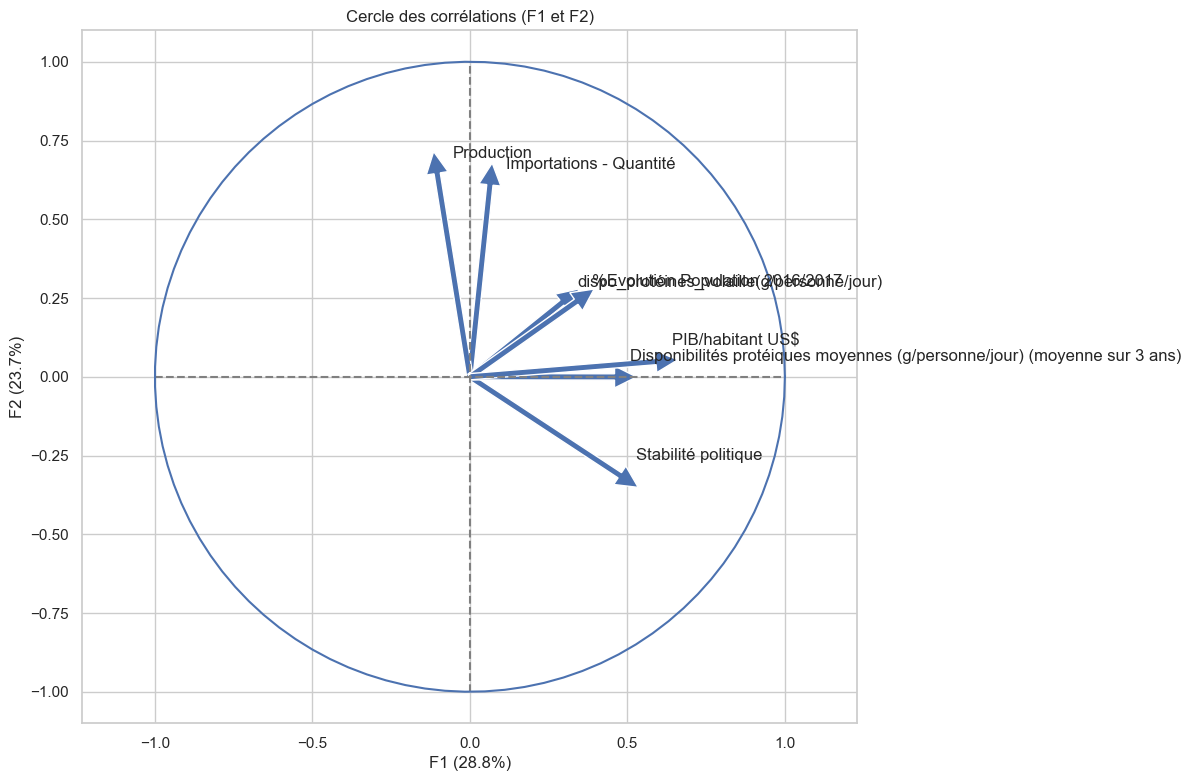

In [79]:
correlation_graph(pca, (0,1), features_subset)

correlation F1 et F2:quantité demandé et pouvoir d'achat

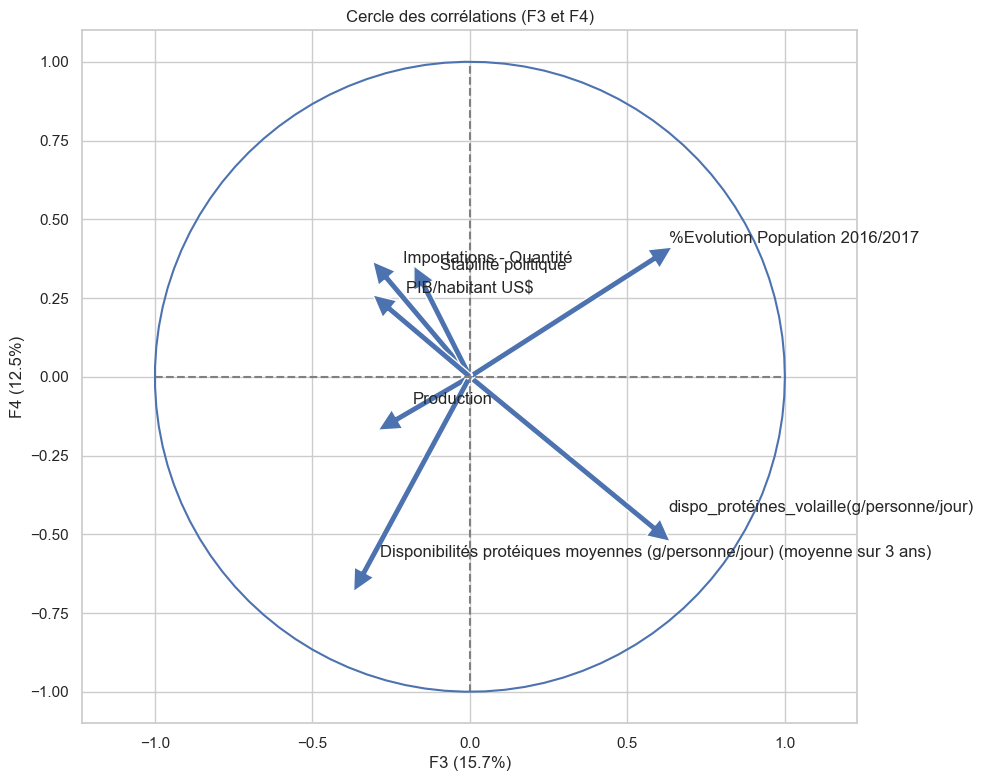

In [80]:
correlation_graph(pca, (2,3), features_subset)

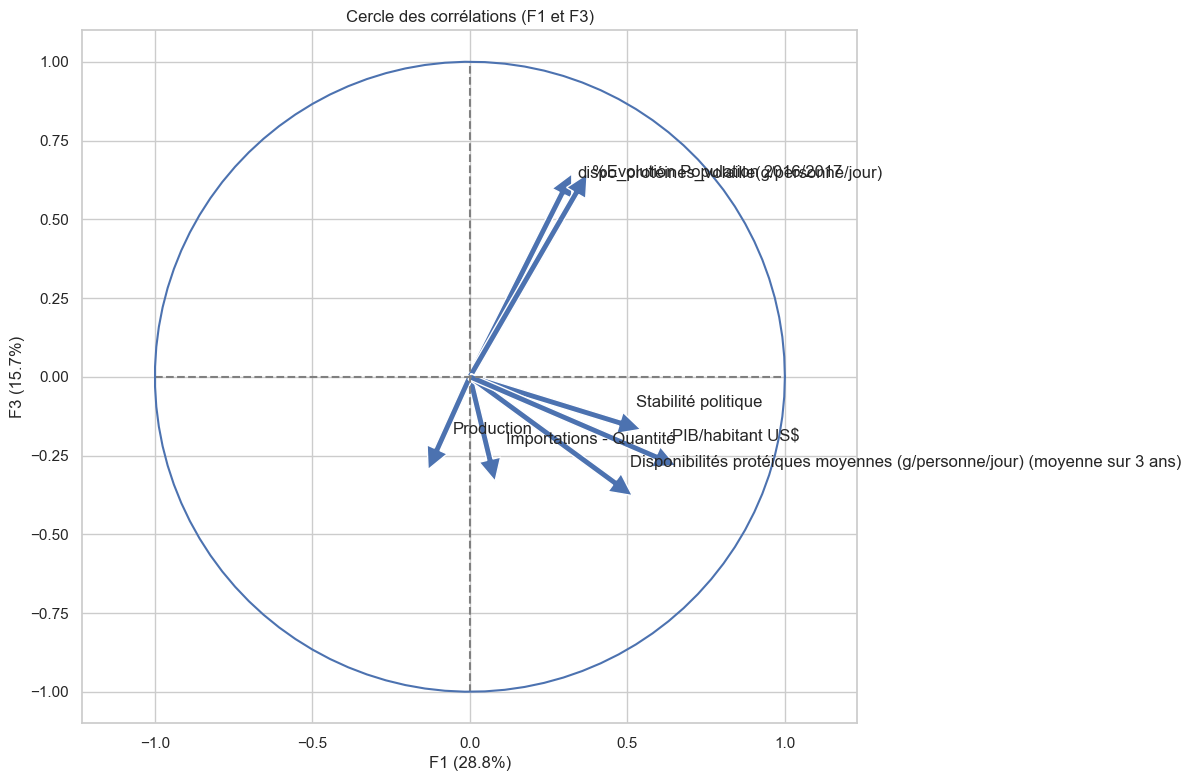

In [81]:
correlation_graph(pca, (0,2), features_subset)

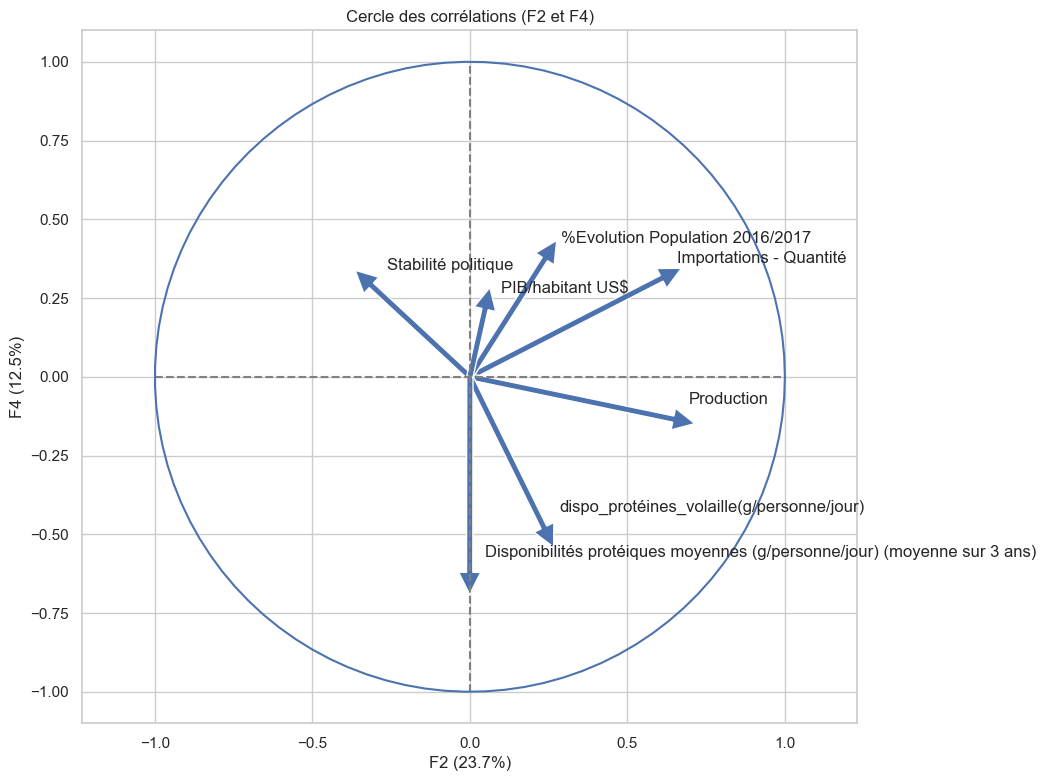

In [82]:
correlation_graph(pca, (1,3), features_subset)

F2 et F4, correlé par quantité demandé & pays politiquement stable

## Projection

In [83]:
Xs_proj = pca.transform(Xs_scaled)
Xs_proj[:7]

array([[-0.67104415,  2.62697707,  1.04232026,  0.31463068,  0.14950986,
         0.03769349, -0.44597201],
       [-0.4857168 , -1.08508843, -0.81397925, -0.77223397, -0.26355595,
        -0.20559871, -0.98069362],
       [ 0.94942721,  2.43811261, -1.77951214,  0.94948963,  0.51805908,
        -0.56394445, -0.52352792],
       [ 0.72787926,  2.81852733,  1.28857472,  0.792387  , -0.28213156,
        -1.82216039, -0.18242059],
       [ 0.11534251,  1.37756947,  0.38112829, -1.1376417 , -0.69655701,
         1.47444836,  0.00772166],
       [-1.50382511, -0.5517356 , -0.11746687, -0.42358883, -1.08257692,
        -0.84539067, -0.47490775],
       [ 1.79962494,  0.65642756,  0.79671756, -0.61015231, -0.15886533,
         1.0579752 ,  0.30157414]])

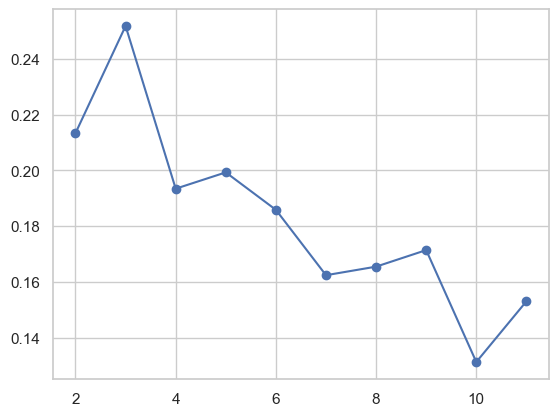

In [86]:
silhouettes=[]
for num_clusters in range(2,12):
    cls=cluster.KMeans(n_clusters=num_clusters,
                       n_init=1, init='random')
    cls.fit(Xs_scaled)
    silh=metrics.silhouette_score(Xs_scaled,cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2,12), silhouettes, marker='o')

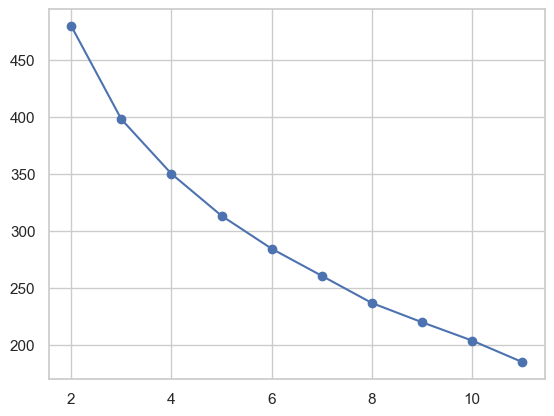

In [87]:
inerties=[]
for k in range(2, 12):
    
    km = cluster.KMeans(n_clusters=k)
    km.fit(Xs_scaled)
    
    inerties.append(km.inertia_)

plt.plot(range(2, 12), inerties, marker='o')
plt.show()

In [88]:
#Nouveau clustering avec k = 4
cls4 = cluster.KMeans(n_clusters=4)
cls4.fit(Xs_scaled)

KMeans(n_clusters=4)

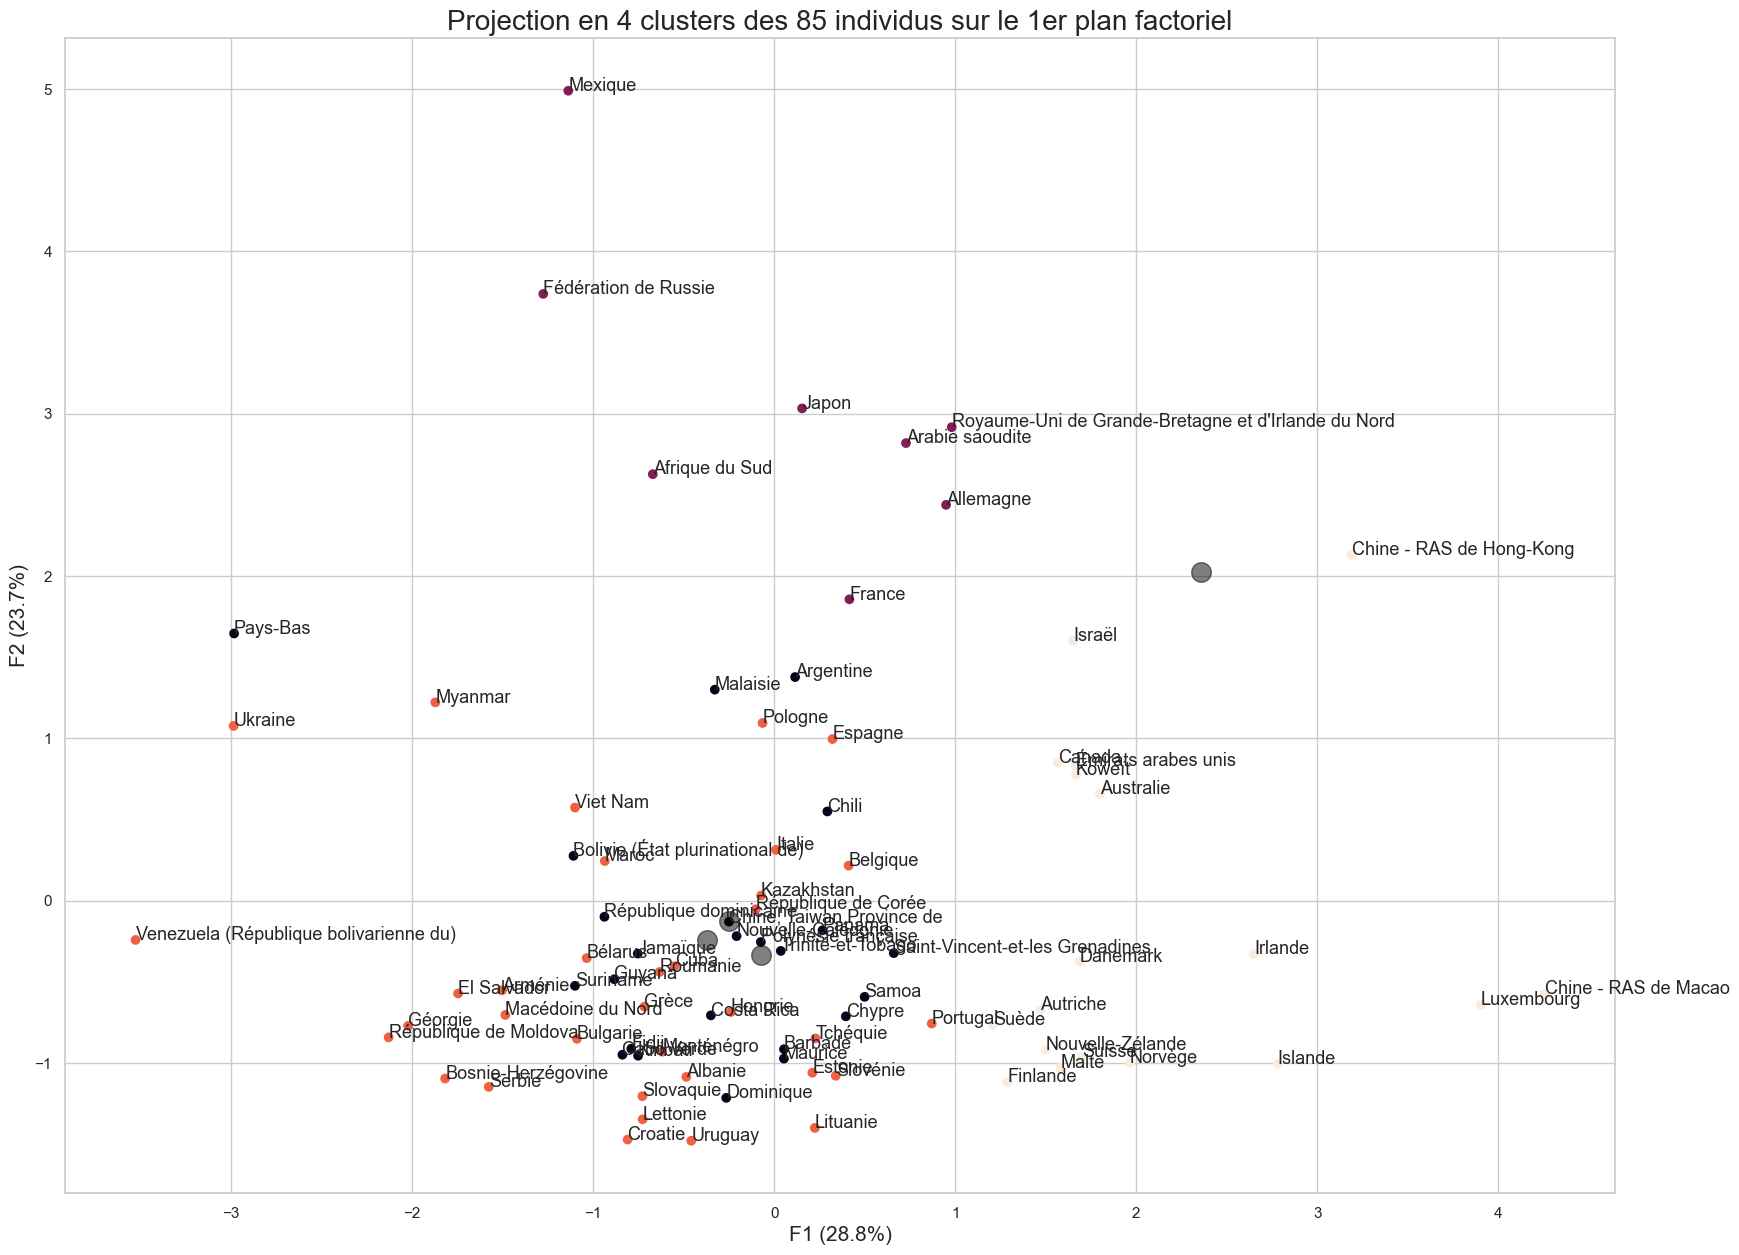

In [89]:
#Projection des 4 clusters sur le premier plan factoriel (F1, F2)
#Coordonnées factorielles 
Xs_projected = pca.transform(Xs_scaled)
plt.figure(figsize=(20, 15))

plt.scatter(Xs_projected[:, 0], Xs_projected[:, 1], c=cls4.labels_)
for i,(x,y) in enumerate(Xs_projected[:,[0,1]]):
                    plt.text(x, y, df_subset.index[i], fontsize='13') 

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=15)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=15)
plt.title("Projection en 4 clusters des {} individus sur le 1er plan factoriel".format(Xs_projected.shape[0]), fontsize=20)

centroids_subset = cls4.cluster_centers_
plt.scatter(centroids_subset[:, 0], centroids_subset[:, 1],s=200, c='black', alpha=0.5)

plt.show()

pays avec correlation F1 et F2:quantité demandé & pouvoir d'achat

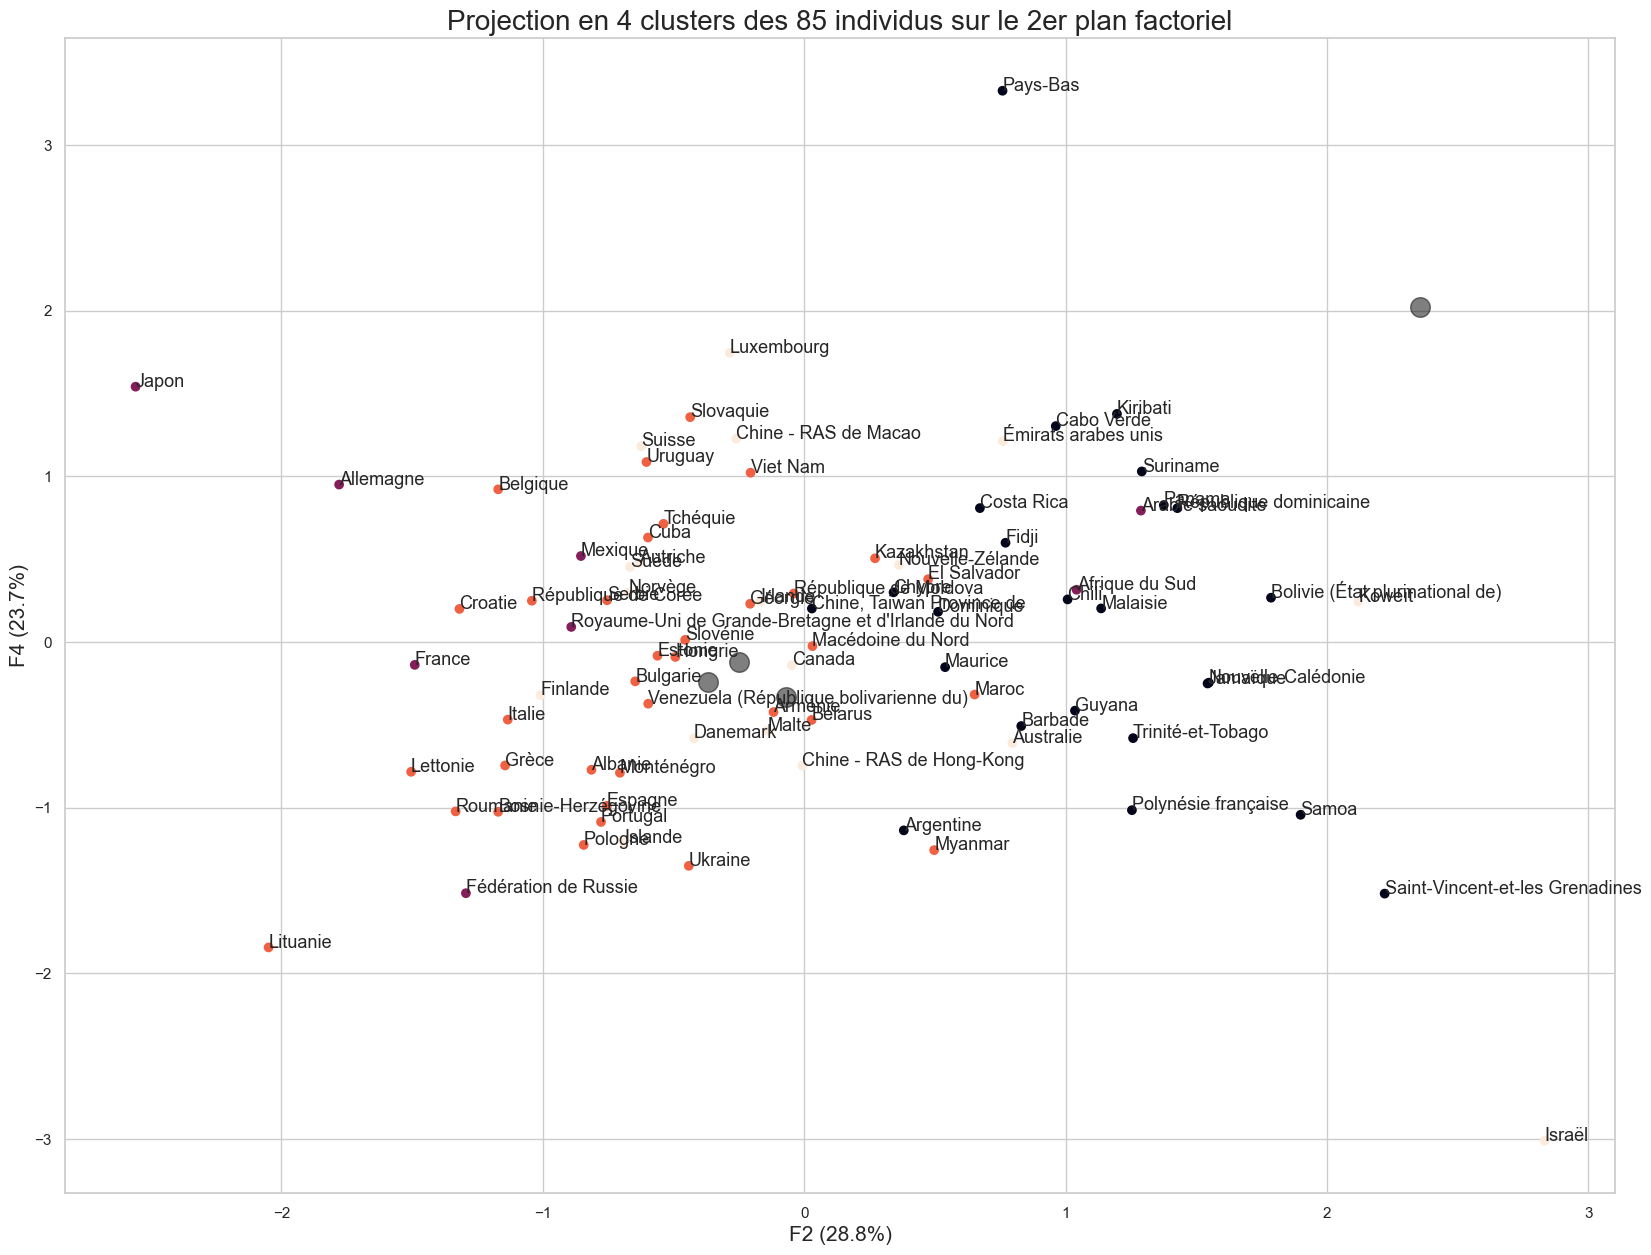

In [90]:
#Projection des 4 clusters sur le premier plan factoriel (F1, F2)
#Coordonnées factorielles 
Xs_projected = pca.transform(Xs_scaled)
plt.figure(figsize=(20, 15))

plt.scatter(Xs_projected[:, 2], Xs_projected[:, 3], c=cls4.labels_)
for i,(x,y) in enumerate(Xs_projected[:,[2,3]]):
                    plt.text(x, y, df_subset.index[i], fontsize='13') 

plt.xlabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[0],1)), fontsize=15)
plt.ylabel('F{} ({}%)'.format(4, round(100*pca.explained_variance_ratio_[1],1)), fontsize=15)
plt.title("Projection en 4 clusters des {} individus sur le 2er plan factoriel".format(Xs_projected.shape[0]), fontsize=20)

centroids_subset = cls4.cluster_centers_
plt.scatter(centroids_subset[:, 0], centroids_subset[:, 1],s=200, c='black', alpha=0.5)

plt.show()

pays avec correlation F2 et F4:quantité demandé & pays politiquement stable

In [92]:
#Tableau d'aide à la comparaison des clusters par les centroïdes
centroids_subset
df_subset_centroides = pd.DataFrame(centroids_subset, columns=df_subset.columns)
df_subset_centroides

,Importations - Quantité,Production,dispo_protéines_volaille(g/personne/jour),%Evolution Population 2016/2017,Stabilité politique,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$
0,-0.369202,-0.242412,0.512318,0.383321,0.112485,-0.768826,-0.621099
1,2.355911,2.022386,0.151600,0.341191,-0.585203,0.130279,0.232717
2,-0.249003,-0.124299,-0.662854,-0.733526,-0.367668,0.025791,-0.347129
3,-0.070629,-0.333929,0.538415,0.763566,0.825021,0.917051,1.399676


In [100]:
#Affichage des 40 pays les plus contributeurs, Contribution des pays dans l'inertie totale : 
di = np.sum(Xs_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame(di, index=df_subset.index, columns=['d_i']).sort_values(by='d_i', ascending=False)
ctr_indiv_inertie[:40]

,d_i
Zone,
Pays-Bas,29.047110
Mexique,27.782057
Fédération de Russie,26.532581
Chine - RAS de Macao,24.572360
Israël,23.931468
Chine - RAS de Hong-Kong,23.768794
Luxembourg,23.262308
Japon,22.201682
Venezuela (République bolivarienne du),18.118264


In [103]:
ctr_indiv_inertie=ctr_indiv_inertie.reset_index()
ctr_indiv_inertie.head()

,Zone,d_i
0,Pays-Bas,29.047110
1,Mexique,27.782057
2,Fédération de Russie,26.532581
3,Chine - RAS de Macao,24.572360
4,Israël,23.931468


<BarContainer object of 85 artists>

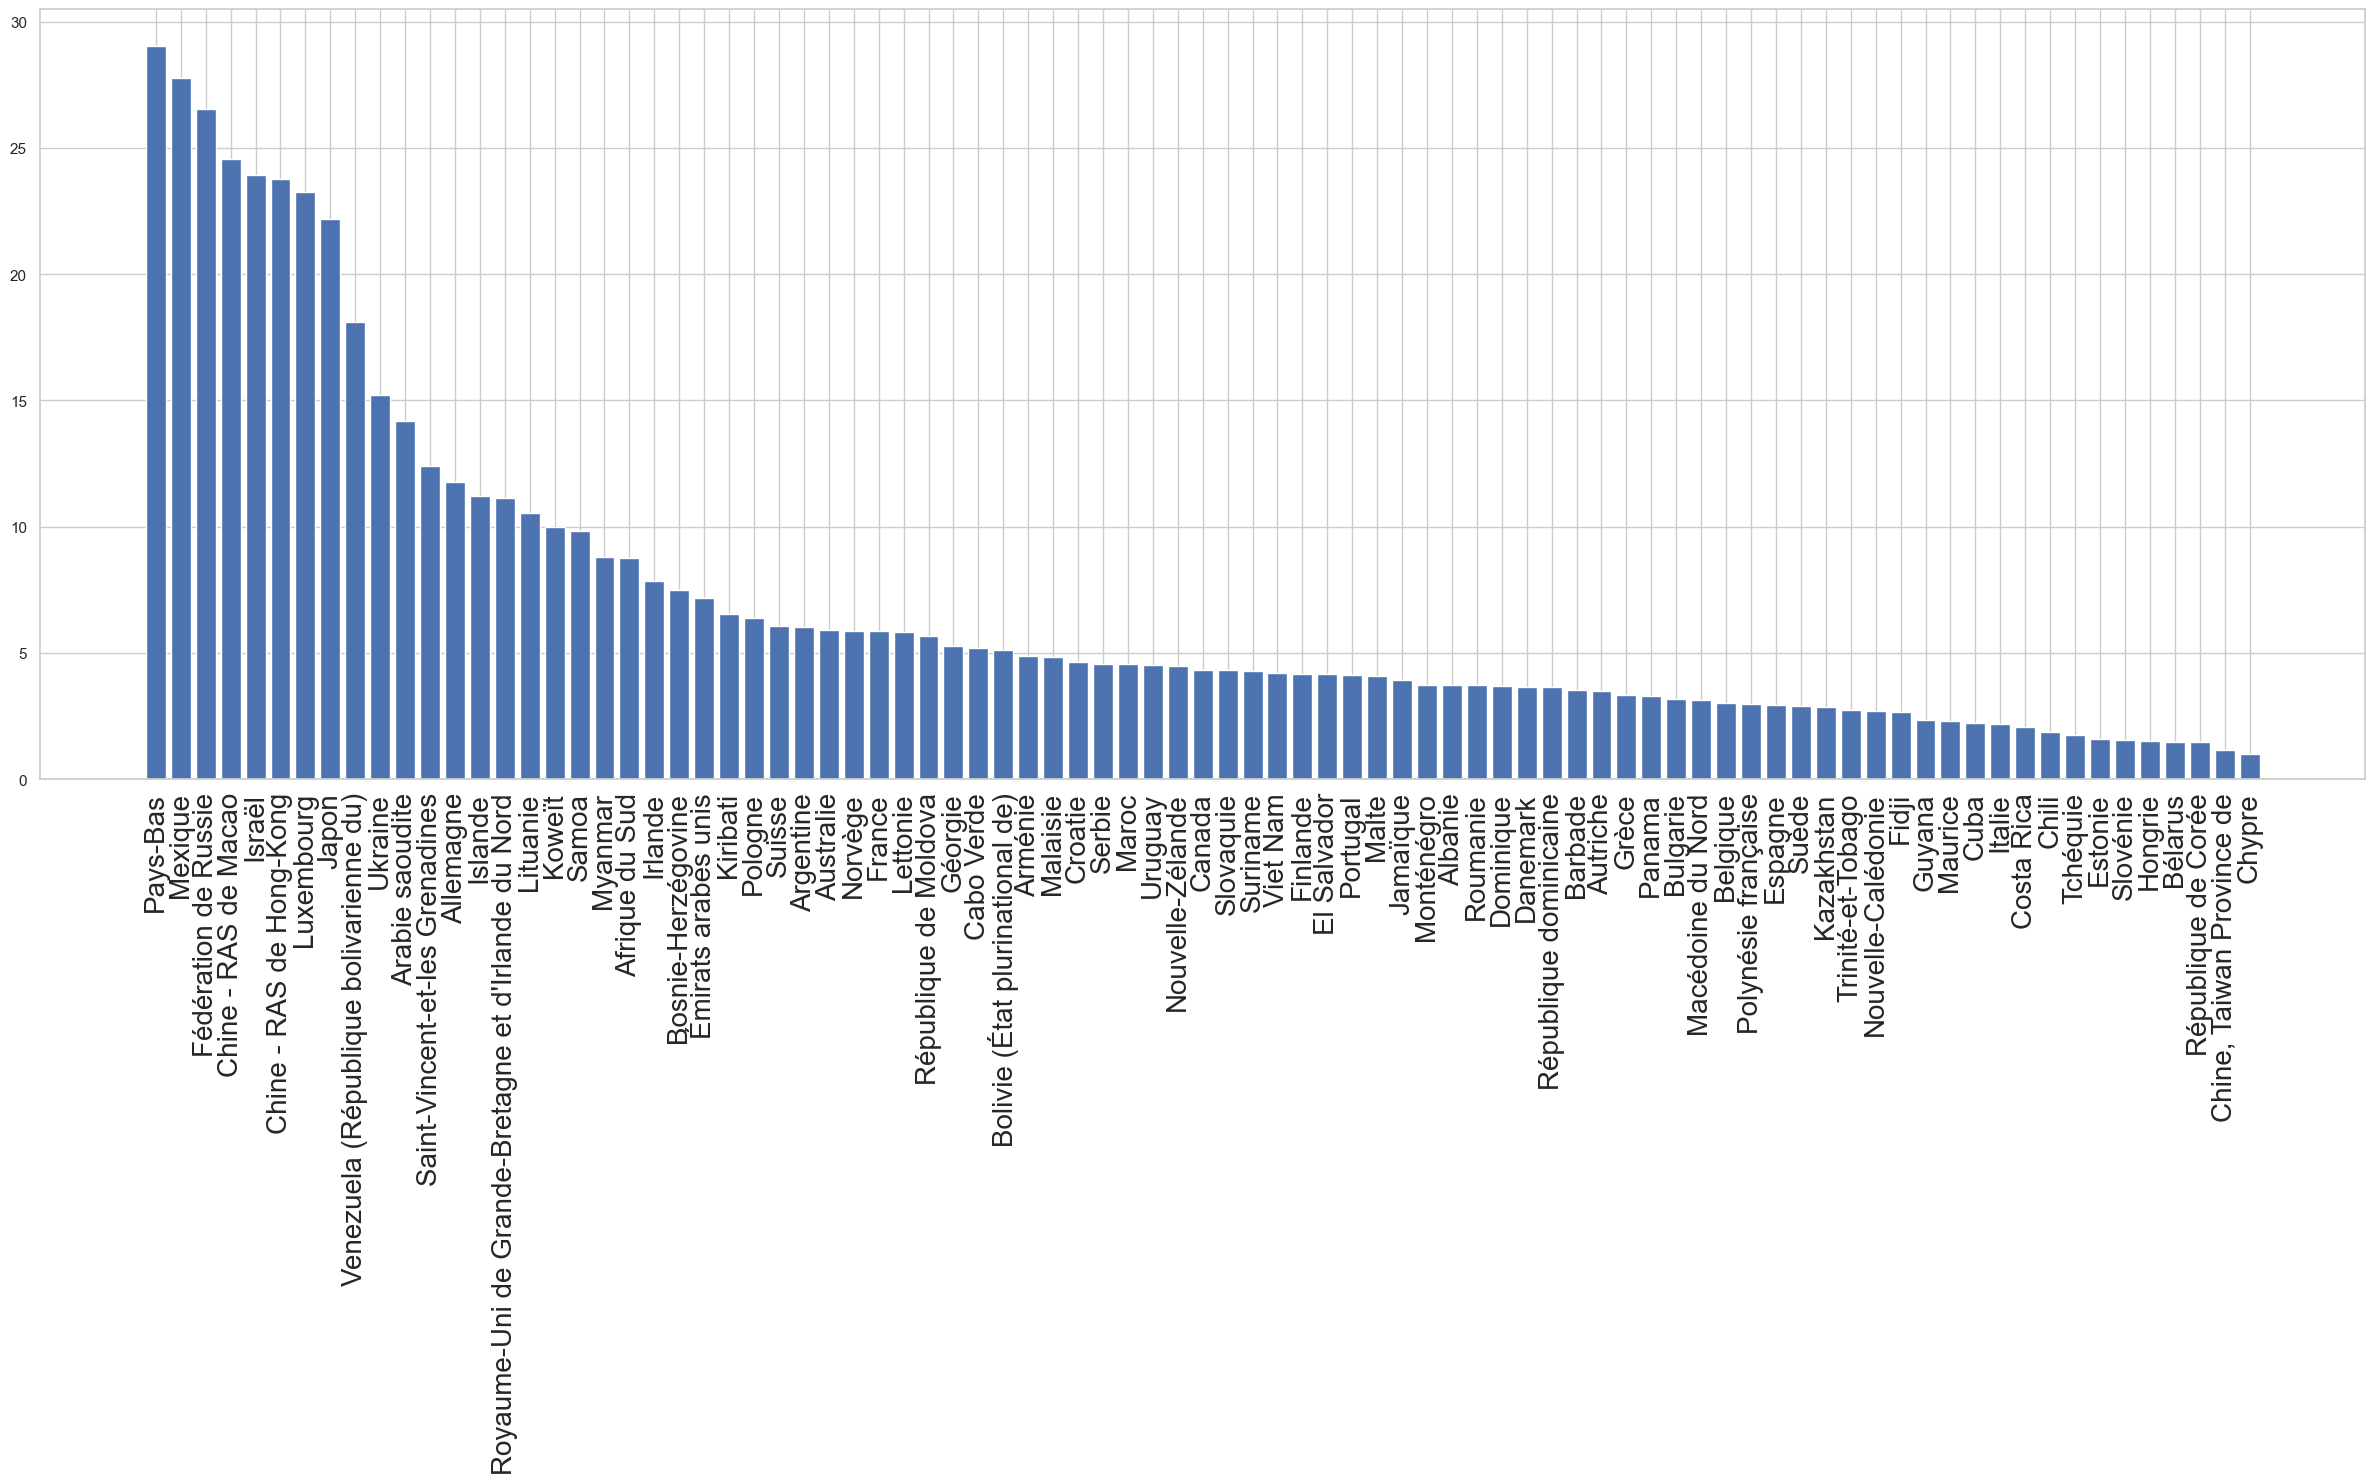

In [112]:
fig = plt.figure(figsize=(30,10))
countries = ctr_indiv_inertie['Zone']
inertie = ctr_indiv_inertie['d_i']
plt.xticks(rotation = 90, fontsize=20)
plt.bar(countries, inertie)

In [113]:
df_subset['Cluster']=cls4.labels_

In [114]:
df_subset=df_subset.reset_index()
df_subset.head()

,Zone,Importations - Quantité,Production,dispo_protéines_volaille(g/personne/jour),%Evolution Population 2016/2017,Stabilité politique,Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),PIB/habitant US$,Cluster
0,Afrique du Sud,514.0,1667.0,14.11,1.43,-0.28,79.7,13860.3,1
1,Albanie,38.0,13.0,6.26,-0.08,0.38,113.3,12771.0,2
2,Allemagne,842.0,1514.0,7.96,0.57,0.59,104.3,53071.5,1
3,Arabie saoudite,722.0,616.0,15.57,2.03,-0.64,88.3,47306.2,1
4,Argentine,8.0,2161.0,13.53,0.99,0.17,105.7,23597.1,0


In [115]:
print(df_subset[df_subset['Cluster'] == 0]['Zone'].unique())

['Argentine' 'Barbade' 'Bolivie (État plurinational de)' 'Cabo Verde'
 'Chili' 'Chine, Taiwan Province de' 'Chypre' 'Costa Rica' 'Dominique'
 'Fidji' 'Guyana' 'Jamaïque' 'Kiribati' 'Malaisie' 'Maurice'
 'Nouvelle-Calédonie' 'Panama' 'Pays-Bas' 'Polynésie française'
 'République dominicaine' 'Saint-Vincent-et-les Grenadines' 'Samoa'
 'Suriname' 'Trinité-et-Tobago']


In [116]:
print(df_subset[df_subset['Cluster'] == 1]['Zone'].unique())

['Afrique du Sud' 'Allemagne' 'Arabie saoudite' 'Fédération de Russie'
 'France' 'Japon' 'Mexique'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [117]:
print(df_subset[df_subset['Cluster'] == 2]['Zone'].unique())

['Albanie' 'Arménie' 'Bélarus' 'Belgique' 'Bosnie-Herzégovine' 'Bulgarie'
 'Croatie' 'Cuba' 'El Salvador' 'Espagne' 'Estonie' 'Géorgie' 'Grèce'
 'Hongrie' 'Italie' 'Kazakhstan' 'Lettonie' 'Lituanie' 'Macédoine du Nord'
 'Maroc' 'Monténégro' 'Myanmar' 'Pologne' 'Portugal' 'République de Corée'
 'République de Moldova' 'Roumanie' 'Serbie' 'Slovaquie' 'Slovénie'
 'Tchéquie' 'Ukraine' 'Uruguay' 'Venezuela (République bolivarienne du)'
 'Viet Nam']


In [118]:
print(df_subset[df_subset['Cluster'] == 3]['Zone'].unique())

['Australie' 'Autriche' 'Canada' 'Chine - RAS de Hong-Kong'
 'Chine - RAS de Macao' 'Danemark' 'Émirats arabes unis' 'Finlande'
 'Irlande' 'Islande' 'Israël' 'Koweït' 'Luxembourg' 'Malte' 'Norvège'
 'Nouvelle-Zélande' 'Suède' 'Suisse']
